<h1>Getting the Environment Set Up</h1>

We will be using tensorflow to create and use our neural networks. Throughout this notebook, we will see just how easy it is to make a working neural network that has a surprisingly high accuracy!

In [1]:
import tensorflow as tf
from tensorflow import keras

<h1>Managing our Images</h1>

In [2]:
# parameters
input_shape = (28, 28) # the image is 28x28
num_classes = 10 # 10 labels
num_epochs = 10 # 10 training iterations
# load our dataset
# TODO You can change to the numbers MNIST dataset if you'd like to see how it works on different images
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ("T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot")

# 60,000 images with each image being 28 by 28 pixels
train_images.shape

(60000, 28, 28)

Each image is represented by a 2-D array where each number in the list represents the brightness of the pixel

In [3]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

That wall of numbers isn't very easy to understand to our brains however. Lets go ahead and display a few of the images from the dataset with matplotlib. If you want to read more about matplot lib, you can go here: https://matplotlib.org/stable/users/index

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def show_imgs():
    plt.figure(figsize=(10,10))
    for i in range(25):
        # Create a 5x5 grid of pictures, place current picture in the grid
        plt.subplot(5,5,i+1)
        # Remove the x and y ticks
        plt.xticks([])
        plt.yticks([])
        # Disable the grid in each picture, we dont want x/y axis for these
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

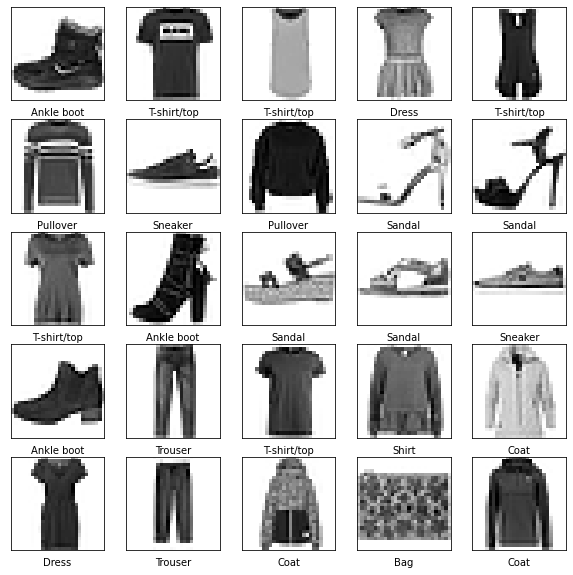

In [5]:
show_imgs()

<h1>Creating Our Model</h1>

Tensorflow lets us create a model super easily. A "Dense" layer is just a layer that is fully connected to the next layer, this is the basic type of layer that we are familiar with. Then all we need to do is specify how many neurons there should be in the given layer and tensorflow figures out the rest.

In [6]:
def create_model():
  model = keras.Sequential()
  # Flatten out the images to be a single row instead of a 28x28 image
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # 128 is the number of neurons on this layer
  model.add(keras.layers.Dense(128, activation='relu'))

  # The final layer has 10 outputs to represent the 10 different classes
  model.add(keras.layers.Dense(num_epochs))

  return model

In [7]:
model = create_model()
# The optimizer is just an algorithm that helps the AI learn faster
# The loss is Sparse Categorical Crossentropy, the name is scary but it just means that 
# the outputs are converted to percentages and then compared to the expected output
# Metrics = accuracy means that we only care about how close the answer was to the actual answer 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

2022-06-14 20:39:28.595708: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-14 20:39:28.596011: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-14 20:39:28.596193: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<h1>Training our Model</h1>

Tensorflow makes training easy. All we need to do is give it the input data and the expected outputs with the number of epochs to train for and it will handle the rest!

In [8]:
model.fit(train_images, train_labels, epochs=num_epochs)

2022-06-14 20:39:28.674050: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-14 20:39:28.674793: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2500000000 Hz


Epoch 1/10


   1/1875 [..............................] - ETA: 13:40 - loss: 178.8304 - accuracy: 0.1250

  12/1875 [..............................] - ETA: 8s - loss: 124.8756 - accuracy: 0.2533   

  30/1875 [..............................] - ETA: 6s - loss: 92.0358 - accuracy: 0.3644 

  50/1875 [..............................] - ETA: 5s - loss: 74.7995 - accuracy: 0.4272

  68/1875 [>.............................] - ETA: 5s - loss: 65.5085 - accuracy: 0.4642

  90/1875 [>.............................] - ETA: 5s - loss: 57.7699 - accuracy: 0.4968

 106/1875 [>.............................] - ETA: 5s - loss: 53.5556 - accuracy: 0.5148

 122/1875 [>.............................] - ETA: 5s - loss: 50.1027 - accuracy: 0.5302

 137/1875 [=>............................] - ETA: 5s - loss: 47.3785 - accuracy: 0.5423

 152/1875 [=>............................] - ETA: 5s - loss: 45.0754 - accuracy: 0.5525

 165/1875 [=>............................] - ETA: 5s - loss: 43.3356 - accuracy: 0.5604

 180/1875 [=>............................] - ETA: 5s - loss: 41.5745 - accuracy: 0.5685

 196/1875 [==>...........................] - ETA: 5s - loss: 39.9269 - accuracy: 0.5759

 214/1875 [==>...........................] - ETA: 5s - loss: 38.2952 - accuracy: 0.5832

 231/1875 [==>...........................] - ETA: 5s - loss: 36.9204 - accuracy: 0.5894

 248/1875 [==>...........................] - ETA: 5s - loss: 35.6777 - accuracy: 0.5949

 264/1875 [===>..........................] - ETA: 5s - loss: 34.6094 - accuracy: 0.5995

 282/1875 [===>..........................] - ETA: 5s - loss: 33.5069 - accuracy: 0.6043

 290/1875 [===>..........................] - ETA: 5s - loss: 33.0458 - accuracy: 0.6063

 304/1875 [===>..........................] - ETA: 5s - loss: 32.2775 - accuracy: 0.6096

 322/1875 [====>.........................] - ETA: 5s - loss: 31.3607 - accuracy: 0.6136

 340/1875 [====>.........................] - ETA: 5s - loss: 30.5098 - accuracy: 0.6173

 359/1875 [====>.........................] - ETA: 5s - loss: 29.6737 - accuracy: 0.6209

 377/1875 [=====>........................] - ETA: 4s - loss: 28.9333 - accuracy: 0.6241

 396/1875 [=====>........................] - ETA: 4s - loss: 28.1995 - accuracy: 0.6270

 408/1875 [=====>........................] - ETA: 4s - loss: 27.7584 - accuracy: 0.6287

 418/1875 [=====>........................] - ETA: 4s - loss: 27.4031 - accuracy: 0.6299

 438/1875 [======>.......................] - ETA: 4s - loss: 26.7235 - accuracy: 0.6322

 455/1875 [======>.......................] - ETA: 4s - loss: 26.1764 - accuracy: 0.6338

 469/1875 [======>.......................] - ETA: 4s - loss: 25.7453 - accuracy: 0.6350

 482/1875 [======>.......................] - ETA: 4s - loss: 25.3599 - accuracy: 0.6360

 501/1875 [=======>......................] - ETA: 4s - loss: 24.8205 - accuracy: 0.6374

 519/1875 [=======>......................] - ETA: 4s - loss: 24.3340 - accuracy: 0.6385

 536/1875 [=======>......................] - ETA: 4s - loss: 23.8949 - accuracy: 0.6395

 554/1875 [=======>......................] - ETA: 4s - loss: 23.4501 - accuracy: 0.6404

 576/1875 [========>.....................] - ETA: 4s - loss: 22.9321 - accuracy: 0.6415

 593/1875 [========>.....................] - ETA: 4s - loss: 22.5501 - accuracy: 0.6424

 609/1875 [========>.....................] - ETA: 4s - loss: 22.2042 - accuracy: 0.6431

 627/1875 [=========>....................] - ETA: 4s - loss: 21.8299 - accuracy: 0.6438

 644/1875 [=========>....................] - ETA: 3s - loss: 21.4898 - accuracy: 0.6445

 653/1875 [=========>....................] - ETA: 3s - loss: 21.3149 - accuracy: 0.6448

 670/1875 [=========>....................] - ETA: 3s - loss: 20.9935 - accuracy: 0.6455

 684/1875 [=========>....................] - ETA: 3s - loss: 20.7374 - accuracy: 0.6459

 696/1875 [==========>...................] - ETA: 3s - loss: 20.5238 - accuracy: 0.6463

 705/1875 [==========>...................] - ETA: 3s - loss: 20.3670 - accuracy: 0.6465

 722/1875 [==========>...................] - ETA: 3s - loss: 20.0785 - accuracy: 0.6470

 742/1875 [==========>...................] - ETA: 3s - loss: 19.7514 - accuracy: 0.6475

 754/1875 [===========>..................] - ETA: 3s - loss: 19.5612 - accuracy: 0.6478

 767/1875 [===========>..................] - ETA: 3s - loss: 19.3600 - accuracy: 0.6482

 780/1875 [===========>..................] - ETA: 3s - loss: 19.1636 - accuracy: 0.6485

 787/1875 [===========>..................] - ETA: 3s - loss: 19.0598 - accuracy: 0.6487

 796/1875 [===========>..................] - ETA: 3s - loss: 18.9283 - accuracy: 0.6489

 810/1875 [===========>..................] - ETA: 3s - loss: 18.7279 - accuracy: 0.6492

 819/1875 [============>.................] - ETA: 3s - loss: 18.6018 - accuracy: 0.6495

 826/1875 [============>.................] - ETA: 3s - loss: 18.5051 - accuracy: 0.6496

 832/1875 [============>.................] - ETA: 3s - loss: 18.4231 - accuracy: 0.6498

 849/1875 [============>.................] - ETA: 3s - loss: 18.1955 - accuracy: 0.6502

 861/1875 [============>.................] - ETA: 3s - loss: 18.0389 - accuracy: 0.6505

 874/1875 [============>.................] - ETA: 3s - loss: 17.8729 - accuracy: 0.6508

 888/1875 [=============>................] - ETA: 3s - loss: 17.6982 - accuracy: 0.6511

 899/1875 [=============>................] - ETA: 3s - loss: 17.5638 - accuracy: 0.6514

 910/1875 [=============>................] - ETA: 3s - loss: 17.4318 - accuracy: 0.6516

 923/1875 [=============>................] - ETA: 3s - loss: 17.2788 - accuracy: 0.6519

 936/1875 [=============>................] - ETA: 3s - loss: 17.1291 - accuracy: 0.6521

 946/1875 [==============>...............] - ETA: 3s - loss: 17.0160 - accuracy: 0.6523

 957/1875 [==============>...............] - ETA: 3s - loss: 16.8937 - accuracy: 0.6525

 971/1875 [==============>...............] - ETA: 3s - loss: 16.7410 - accuracy: 0.6528

 988/1875 [==============>...............] - ETA: 3s - loss: 16.5600 - accuracy: 0.6531

1001/1875 [===============>..............] - ETA: 3s - loss: 16.4248 - accuracy: 0.6534

1019/1875 [===============>..............] - ETA: 3s - loss: 16.2419 - accuracy: 0.6537

1036/1875 [===============>..............] - ETA: 2s - loss: 16.0735 - accuracy: 0.6540

1042/1875 [===============>..............] - ETA: 2s - loss: 16.0151 - accuracy: 0.6542

1055/1875 [===============>..............] - ETA: 2s - loss: 15.8903 - accuracy: 0.6544

1078/1875 [================>.............] - ETA: 2s - loss: 15.6750 - accuracy: 0.6549

1090/1875 [================>.............] - ETA: 2s - loss: 15.5655 - accuracy: 0.6551

1108/1875 [================>.............] - ETA: 2s - loss: 15.4045 - accuracy: 0.6555

1123/1875 [================>.............] - ETA: 2s - loss: 15.2734 - accuracy: 0.6557

1138/1875 [=================>............] - ETA: 2s - loss: 15.1450 - accuracy: 0.6560

1155/1875 [=================>............] - ETA: 2s - loss: 15.0026 - accuracy: 0.6564

1168/1875 [=================>............] - ETA: 2s - loss: 14.8959 - accuracy: 0.6566

1189/1875 [==================>...........] - ETA: 2s - loss: 14.7272 - accuracy: 0.6570

1205/1875 [==================>...........] - ETA: 2s - loss: 14.6018 - accuracy: 0.6573

1219/1875 [==================>...........] - ETA: 2s - loss: 14.4941 - accuracy: 0.6575

1235/1875 [==================>...........] - ETA: 2s - loss: 14.3734 - accuracy: 0.6578

1248/1875 [==================>...........] - ETA: 2s - loss: 14.2771 - accuracy: 0.6580

1258/1875 [===================>..........] - ETA: 2s - loss: 14.2041 - accuracy: 0.6582

1268/1875 [===================>..........] - ETA: 2s - loss: 14.1319 - accuracy: 0.6584

1280/1875 [===================>..........] - ETA: 2s - loss: 14.0465 - accuracy: 0.6586

1293/1875 [===================>..........] - ETA: 2s - loss: 13.9554 - accuracy: 0.6588

1308/1875 [===================>..........] - ETA: 2s - loss: 13.8520 - accuracy: 0.6591

1325/1875 [====================>.........] - ETA: 1s - loss: 13.7370 - accuracy: 0.6593

1343/1875 [====================>.........] - ETA: 1s - loss: 13.6178 - accuracy: 0.6596

1362/1875 [====================>.........] - ETA: 1s - loss: 13.4946 - accuracy: 0.6599

1379/1875 [=====================>........] - ETA: 1s - loss: 13.3866 - accuracy: 0.6602

1391/1875 [=====================>........] - ETA: 1s - loss: 13.3117 - accuracy: 0.6604

1405/1875 [=====================>........] - ETA: 1s - loss: 13.2254 - accuracy: 0.6606

1424/1875 [=====================>........] - ETA: 1s - loss: 13.1105 - accuracy: 0.6609

1442/1875 [======================>.......] - ETA: 1s - loss: 13.0039 - accuracy: 0.6612

1456/1875 [======================>.......] - ETA: 1s - loss: 12.9224 - accuracy: 0.6615

1476/1875 [======================>.......] - ETA: 1s - loss: 12.8080 - accuracy: 0.6618

1495/1875 [======================>.......] - ETA: 1s - loss: 12.7016 - accuracy: 0.6621

1510/1875 [=======================>......] - ETA: 1s - loss: 12.6190 - accuracy: 0.6623

1526/1875 [=======================>......] - ETA: 1s - loss: 12.5324 - accuracy: 0.6625

1539/1875 [=======================>......] - ETA: 1s - loss: 12.4631 - accuracy: 0.6627

1550/1875 [=======================>......] - ETA: 1s - loss: 12.4051 - accuracy: 0.6629

1561/1875 [=======================>......] - ETA: 1s - loss: 12.3478 - accuracy: 0.6631

1579/1875 [========================>.....] - ETA: 1s - loss: 12.2554 - accuracy: 0.6633

1600/1875 [========================>.....] - ETA: 0s - loss: 12.1496 - accuracy: 0.6636

1620/1875 [========================>.....] - ETA: 0s - loss: 12.0510 - accuracy: 0.6639

1637/1875 [=========================>....] - ETA: 0s - loss: 11.9686 - accuracy: 0.6641

1653/1875 [=========================>....] - ETA: 0s - loss: 11.8923 - accuracy: 0.6644

1667/1875 [=========================>....] - ETA: 0s - loss: 11.8265 - accuracy: 0.6645

1687/1875 [=========================>....] - ETA: 0s - loss: 11.7339 - accuracy: 0.6648

1703/1875 [==========================>...] - ETA: 0s - loss: 11.6612 - accuracy: 0.6650

1719/1875 [==========================>...] - ETA: 0s - loss: 11.5895 - accuracy: 0.6652

1733/1875 [==========================>...] - ETA: 0s - loss: 11.5276 - accuracy: 0.6654

1747/1875 [==========================>...] - ETA: 0s - loss: 11.4665 - accuracy: 0.6656

1762/1875 [===========================>..] - ETA: 0s - loss: 11.4019 - accuracy: 0.6658

1771/1875 [===========================>..] - ETA: 0s - loss: 11.3636 - accuracy: 0.6659

1789/1875 [===========================>..] - ETA: 0s - loss: 11.2878 - accuracy: 0.6661

1805/1875 [===========================>..] - ETA: 0s - loss: 11.2215 - accuracy: 0.6663

1819/1875 [============================>.] - ETA: 0s - loss: 11.1643 - accuracy: 0.6665

1831/1875 [============================>.] - ETA: 0s - loss: 11.1157 - accuracy: 0.6666

1846/1875 [============================>.] - ETA: 0s - loss: 11.0558 - accuracy: 0.6668

1859/1875 [============================>.] - ETA: 0s - loss: 11.0045 - accuracy: 0.6670

1875/1875 [==============================] - ETA: 0s - loss: 10.9421 - accuracy: 0.6672

1875/1875 [==============================] - 7s 3ms/step - loss: 10.9382 - accuracy: 0.6672


Epoch 2/10
   1/1875 [..............................] - ETA: 4s - loss: 0.5355 - accuracy: 0.7812

  22/1875 [..............................] - ETA: 4s - loss: 0.6406 - accuracy: 0.7695

  43/1875 [..............................] - ETA: 4s - loss: 0.6250 - accuracy: 0.7743

  65/1875 [>.............................] - ETA: 4s - loss: 0.6152 - accuracy: 0.7767

  71/1875 [>.............................] - ETA: 5s - loss: 0.6142 - accuracy: 0.7769

  93/1875 [>.............................] - ETA: 5s - loss: 0.6225 - accuracy: 0.7755

 112/1875 [>.............................] - ETA: 4s - loss: 0.6310 - accuracy: 0.7729

 128/1875 [=>............................] - ETA: 4s - loss: 0.6375 - accuracy: 0.7712

 146/1875 [=>............................] - ETA: 4s - loss: 0.6437 - accuracy: 0.7692

 165/1875 [=>............................] - ETA: 4s - loss: 0.6489 - accuracy: 0.7677

 174/1875 [=>............................] - ETA: 5s - loss: 0.6515 - accuracy: 0.7669

 190/1875 [==>...........................] - ETA: 5s - loss: 0.6556 - accuracy: 0.7656

 205/1875 [==>...........................] - ETA: 5s - loss: 0.6589 - accuracy: 0.7644

 219/1875 [==>...........................] - ETA: 5s - loss: 0.6616 - accuracy: 0.7633

 232/1875 [==>...........................] - ETA: 5s - loss: 0.6640 - accuracy: 0.7624

 246/1875 [==>...........................] - ETA: 5s - loss: 0.6662 - accuracy: 0.7613

 260/1875 [===>..........................] - ETA: 5s - loss: 0.6682 - accuracy: 0.7603

 277/1875 [===>..........................] - ETA: 5s - loss: 0.6705 - accuracy: 0.7591

 291/1875 [===>..........................] - ETA: 5s - loss: 0.6722 - accuracy: 0.7581

 309/1875 [===>..........................] - ETA: 5s - loss: 0.6744 - accuracy: 0.7569

 325/1875 [====>.........................] - ETA: 5s - loss: 0.6762 - accuracy: 0.7559

 344/1875 [====>.........................] - ETA: 4s - loss: 0.6781 - accuracy: 0.7548

 360/1875 [====>.........................] - ETA: 4s - loss: 0.6795 - accuracy: 0.7539

 374/1875 [====>.........................] - ETA: 4s - loss: 0.6806 - accuracy: 0.7532

 392/1875 [=====>........................] - ETA: 4s - loss: 0.6821 - accuracy: 0.7523

 407/1875 [=====>........................] - ETA: 4s - loss: 0.6835 - accuracy: 0.7516

 421/1875 [=====>........................] - ETA: 4s - loss: 0.6847 - accuracy: 0.7509

 436/1875 [=====>........................] - ETA: 4s - loss: 0.6858 - accuracy: 0.7503

 449/1875 [======>.......................] - ETA: 4s - loss: 0.6867 - accuracy: 0.7497

 464/1875 [======>.......................] - ETA: 4s - loss: 0.6875 - accuracy: 0.7492

 478/1875 [======>.......................] - ETA: 4s - loss: 0.6882 - accuracy: 0.7487

 491/1875 [======>.......................] - ETA: 4s - loss: 0.6888 - accuracy: 0.7482

 508/1875 [=======>......................] - ETA: 4s - loss: 0.6895 - accuracy: 0.7477

 519/1875 [=======>......................] - ETA: 4s - loss: 0.6900 - accuracy: 0.7473

 535/1875 [=======>......................] - ETA: 4s - loss: 0.6905 - accuracy: 0.7469

 553/1875 [=======>......................] - ETA: 4s - loss: 0.6911 - accuracy: 0.7464

 572/1875 [========>.....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.7459

 586/1875 [========>.....................] - ETA: 4s - loss: 0.6922 - accuracy: 0.7455

 605/1875 [========>.....................] - ETA: 4s - loss: 0.6928 - accuracy: 0.7450

 622/1875 [========>.....................] - ETA: 4s - loss: 0.6934 - accuracy: 0.7446

 644/1875 [=========>....................] - ETA: 3s - loss: 0.6942 - accuracy: 0.7440

 660/1875 [=========>....................] - ETA: 3s - loss: 0.6947 - accuracy: 0.7437

 674/1875 [=========>....................] - ETA: 3s - loss: 0.6951 - accuracy: 0.7434

 692/1875 [==========>...................] - ETA: 3s - loss: 0.6956 - accuracy: 0.7430

 710/1875 [==========>...................] - ETA: 3s - loss: 0.6961 - accuracy: 0.7426

 725/1875 [==========>...................] - ETA: 3s - loss: 0.6965 - accuracy: 0.7423

 739/1875 [==========>...................] - ETA: 3s - loss: 0.6968 - accuracy: 0.7420

 753/1875 [===========>..................] - ETA: 3s - loss: 0.6971 - accuracy: 0.7418

 772/1875 [===========>..................] - ETA: 3s - loss: 0.6975 - accuracy: 0.7415

 786/1875 [===========>..................] - ETA: 3s - loss: 0.6978 - accuracy: 0.7412

 798/1875 [===========>..................] - ETA: 3s - loss: 0.6981 - accuracy: 0.7410

 816/1875 [============>.................] - ETA: 3s - loss: 0.6985 - accuracy: 0.7407

 833/1875 [============>.................] - ETA: 3s - loss: 0.6988 - accuracy: 0.7404

 848/1875 [============>.................] - ETA: 3s - loss: 0.6991 - accuracy: 0.7402

 863/1875 [============>.................] - ETA: 3s - loss: 0.6994 - accuracy: 0.7399

 875/1875 [=============>................] - ETA: 3s - loss: 0.6997 - accuracy: 0.7398

 887/1875 [=============>................] - ETA: 3s - loss: 0.6999 - accuracy: 0.7396

 905/1875 [=============>................] - ETA: 3s - loss: 0.7002 - accuracy: 0.7393

 918/1875 [=============>................] - ETA: 3s - loss: 0.7004 - accuracy: 0.7391

 939/1875 [==============>...............] - ETA: 3s - loss: 0.7007 - accuracy: 0.7389

 949/1875 [==============>...............] - ETA: 3s - loss: 0.7008 - accuracy: 0.7387

 970/1875 [==============>...............] - ETA: 2s - loss: 0.7011 - accuracy: 0.7385

 982/1875 [==============>...............] - ETA: 2s - loss: 0.7012 - accuracy: 0.7384

 989/1875 [==============>...............] - ETA: 2s - loss: 0.7013 - accuracy: 0.7383

1002/1875 [===============>..............] - ETA: 2s - loss: 0.7015 - accuracy: 0.7381

1012/1875 [===============>..............] - ETA: 2s - loss: 0.7016 - accuracy: 0.7380

1022/1875 [===============>..............] - ETA: 2s - loss: 0.7017 - accuracy: 0.7379

1032/1875 [===============>..............] - ETA: 2s - loss: 0.7019 - accuracy: 0.7378

1042/1875 [===============>..............] - ETA: 2s - loss: 0.7020 - accuracy: 0.7377

1055/1875 [===============>..............] - ETA: 2s - loss: 0.7022 - accuracy: 0.7375

1062/1875 [===============>..............] - ETA: 2s - loss: 0.7023 - accuracy: 0.7374

1073/1875 [================>.............] - ETA: 2s - loss: 0.7024 - accuracy: 0.7373

1084/1875 [================>.............] - ETA: 2s - loss: 0.7026 - accuracy: 0.7372

1103/1875 [================>.............] - ETA: 2s - loss: 0.7028 - accuracy: 0.7370

1117/1875 [================>.............] - ETA: 2s - loss: 0.7030 - accuracy: 0.7368

1127/1875 [=================>............] - ETA: 2s - loss: 0.7031 - accuracy: 0.7367

1137/1875 [=================>............] - ETA: 2s - loss: 0.7032 - accuracy: 0.7366

1146/1875 [=================>............] - ETA: 2s - loss: 0.7033 - accuracy: 0.7365

1158/1875 [=================>............] - ETA: 2s - loss: 0.7034 - accuracy: 0.7363

1168/1875 [=================>............] - ETA: 2s - loss: 0.7035 - accuracy: 0.7362

1179/1875 [=================>............] - ETA: 2s - loss: 0.7036 - accuracy: 0.7361

1190/1875 [==================>...........] - ETA: 2s - loss: 0.7037 - accuracy: 0.7360

1201/1875 [==================>...........] - ETA: 2s - loss: 0.7039 - accuracy: 0.7359

1212/1875 [==================>...........] - ETA: 2s - loss: 0.7040 - accuracy: 0.7358

1219/1875 [==================>...........] - ETA: 2s - loss: 0.7041 - accuracy: 0.7357

1230/1875 [==================>...........] - ETA: 2s - loss: 0.7042 - accuracy: 0.7356

1243/1875 [==================>...........] - ETA: 2s - loss: 0.7043 - accuracy: 0.7354

1252/1875 [===================>..........] - ETA: 2s - loss: 0.7044 - accuracy: 0.7353

1262/1875 [===================>..........] - ETA: 2s - loss: 0.7045 - accuracy: 0.7352

1272/1875 [===================>..........] - ETA: 2s - loss: 0.7046 - accuracy: 0.7351

1284/1875 [===================>..........] - ETA: 2s - loss: 0.7048 - accuracy: 0.7350

1292/1875 [===================>..........] - ETA: 2s - loss: 0.7048 - accuracy: 0.7349

1308/1875 [===================>..........] - ETA: 2s - loss: 0.7050 - accuracy: 0.7348

1325/1875 [====================>.........] - ETA: 2s - loss: 0.7052 - accuracy: 0.7346

1342/1875 [====================>.........] - ETA: 1s - loss: 0.7054 - accuracy: 0.7344

1358/1875 [====================>.........] - ETA: 1s - loss: 0.7056 - accuracy: 0.7343

1376/1875 [=====================>........] - ETA: 1s - loss: 0.7057 - accuracy: 0.7341

1393/1875 [=====================>........] - ETA: 1s - loss: 0.7059 - accuracy: 0.7339

1397/1875 [=====================>........] - ETA: 1s - loss: 0.7059 - accuracy: 0.7339

1409/1875 [=====================>........] - ETA: 1s - loss: 0.7061 - accuracy: 0.7338

1417/1875 [=====================>........] - ETA: 1s - loss: 0.7061 - accuracy: 0.7337

1426/1875 [=====================>........] - ETA: 1s - loss: 0.7062 - accuracy: 0.7336

1441/1875 [======================>.......] - ETA: 1s - loss: 0.7064 - accuracy: 0.7335

1455/1875 [======================>.......] - ETA: 1s - loss: 0.7065 - accuracy: 0.7334

1475/1875 [======================>.......] - ETA: 1s - loss: 0.7066 - accuracy: 0.7332

1490/1875 [======================>.......] - ETA: 1s - loss: 0.7067 - accuracy: 0.7331

1507/1875 [=======================>......] - ETA: 1s - loss: 0.7069 - accuracy: 0.7330

1522/1875 [=======================>......] - ETA: 1s - loss: 0.7069 - accuracy: 0.7328

1537/1875 [=======================>......] - ETA: 1s - loss: 0.7070 - accuracy: 0.7327

1550/1875 [=======================>......] - ETA: 1s - loss: 0.7071 - accuracy: 0.7326

1568/1875 [========================>.....] - ETA: 1s - loss: 0.7072 - accuracy: 0.7325

1583/1875 [========================>.....] - ETA: 1s - loss: 0.7073 - accuracy: 0.7324

1598/1875 [========================>.....] - ETA: 1s - loss: 0.7073 - accuracy: 0.7323

1614/1875 [========================>.....] - ETA: 0s - loss: 0.7074 - accuracy: 0.7322

1624/1875 [========================>.....] - ETA: 0s - loss: 0.7075 - accuracy: 0.7322

1634/1875 [=========================>....] - ETA: 0s - loss: 0.7075 - accuracy: 0.7321

1647/1875 [=========================>....] - ETA: 0s - loss: 0.7076 - accuracy: 0.7320

1658/1875 [=========================>....] - ETA: 0s - loss: 0.7076 - accuracy: 0.7320

1670/1875 [=========================>....] - ETA: 0s - loss: 0.7076 - accuracy: 0.7319

1686/1875 [=========================>....] - ETA: 0s - loss: 0.7077 - accuracy: 0.7318

1698/1875 [==========================>...] - ETA: 0s - loss: 0.7078 - accuracy: 0.7318

1705/1875 [==========================>...] - ETA: 0s - loss: 0.7078 - accuracy: 0.7317

1723/1875 [==========================>...] - ETA: 0s - loss: 0.7078 - accuracy: 0.7316

1732/1875 [==========================>...] - ETA: 0s - loss: 0.7079 - accuracy: 0.7316

1742/1875 [==========================>...] - ETA: 0s - loss: 0.7079 - accuracy: 0.7315

1756/1875 [===========================>..] - ETA: 0s - loss: 0.7079 - accuracy: 0.7315

1768/1875 [===========================>..] - ETA: 0s - loss: 0.7080 - accuracy: 0.7314

1781/1875 [===========================>..] - ETA: 0s - loss: 0.7080 - accuracy: 0.7313

1789/1875 [===========================>..] - ETA: 0s - loss: 0.7080 - accuracy: 0.7313

1799/1875 [===========================>..] - ETA: 0s - loss: 0.7080 - accuracy: 0.7312

1811/1875 [===========================>..] - ETA: 0s - loss: 0.7080 - accuracy: 0.7312

1824/1875 [============================>.] - ETA: 0s - loss: 0.7080 - accuracy: 0.7311

1835/1875 [============================>.] - ETA: 0s - loss: 0.7081 - accuracy: 0.7311

1847/1875 [============================>.] - ETA: 0s - loss: 0.7081 - accuracy: 0.7310

1855/1875 [============================>.] - ETA: 0s - loss: 0.7081 - accuracy: 0.7310

1869/1875 [============================>.] - ETA: 0s - loss: 0.7081 - accuracy: 0.7310

1875/1875 [==============================] - 7s 4ms/step - loss: 0.7081 - accuracy: 0.7309


Epoch 3/10
   1/1875 [..............................] - ETA: 19s - loss: 0.6210 - accuracy: 0.7188

  14/1875 [..............................] - ETA: 7s - loss: 0.7216 - accuracy: 0.7125 

  25/1875 [..............................] - ETA: 8s - loss: 0.6983 - accuracy: 0.7305

  38/1875 [..............................] - ETA: 7s - loss: 0.6752 - accuracy: 0.7411

  49/1875 [..............................] - ETA: 7s - loss: 0.6636 - accuracy: 0.7434

  57/1875 [..............................] - ETA: 8s - loss: 0.6578 - accuracy: 0.7439

  69/1875 [>.............................] - ETA: 8s - loss: 0.6517 - accuracy: 0.7438

  85/1875 [>.............................] - ETA: 7s - loss: 0.6464 - accuracy: 0.7433

  99/1875 [>.............................] - ETA: 7s - loss: 0.6424 - accuracy: 0.7430

 107/1875 [>.............................] - ETA: 7s - loss: 0.6407 - accuracy: 0.7427

 123/1875 [>.............................] - ETA: 7s - loss: 0.6376 - accuracy: 0.7425

 133/1875 [=>............................] - ETA: 7s - loss: 0.6361 - accuracy: 0.7424

 145/1875 [=>............................] - ETA: 7s - loss: 0.6345 - accuracy: 0.7423

 159/1875 [=>............................] - ETA: 7s - loss: 0.6332 - accuracy: 0.7422

 171/1875 [=>............................] - ETA: 7s - loss: 0.6325 - accuracy: 0.7421

 181/1875 [=>............................] - ETA: 7s - loss: 0.6321 - accuracy: 0.7422

 196/1875 [==>...........................] - ETA: 7s - loss: 0.6313 - accuracy: 0.7423

 215/1875 [==>...........................] - ETA: 6s - loss: 0.6309 - accuracy: 0.7423

 227/1875 [==>...........................] - ETA: 6s - loss: 0.6306 - accuracy: 0.7422

 238/1875 [==>...........................] - ETA: 6s - loss: 0.6302 - accuracy: 0.7422

 249/1875 [==>...........................] - ETA: 6s - loss: 0.6299 - accuracy: 0.7421

 262/1875 [===>..........................] - ETA: 6s - loss: 0.6296 - accuracy: 0.7421

 274/1875 [===>..........................] - ETA: 6s - loss: 0.6295 - accuracy: 0.7421

 285/1875 [===>..........................] - ETA: 6s - loss: 0.6294 - accuracy: 0.7421

 298/1875 [===>..........................] - ETA: 6s - loss: 0.6295 - accuracy: 0.7421

 306/1875 [===>..........................] - ETA: 6s - loss: 0.6295 - accuracy: 0.7421

 321/1875 [====>.........................] - ETA: 6s - loss: 0.6295 - accuracy: 0.7421

 331/1875 [====>.........................] - ETA: 6s - loss: 0.6294 - accuracy: 0.7422

 342/1875 [====>.........................] - ETA: 6s - loss: 0.6294 - accuracy: 0.7422

 355/1875 [====>.........................] - ETA: 6s - loss: 0.6294 - accuracy: 0.7423

 365/1875 [====>.........................] - ETA: 6s - loss: 0.6293 - accuracy: 0.7423

 374/1875 [====>.........................] - ETA: 6s - loss: 0.6292 - accuracy: 0.7424

 389/1875 [=====>........................] - ETA: 6s - loss: 0.6291 - accuracy: 0.7425

 404/1875 [=====>........................] - ETA: 6s - loss: 0.6290 - accuracy: 0.7427

 418/1875 [=====>........................] - ETA: 6s - loss: 0.6289 - accuracy: 0.7428

 436/1875 [=====>........................] - ETA: 6s - loss: 0.6288 - accuracy: 0.7429

 445/1875 [======>.......................] - ETA: 6s - loss: 0.6288 - accuracy: 0.7430

 459/1875 [======>.......................] - ETA: 5s - loss: 0.6288 - accuracy: 0.7431

 472/1875 [======>.......................] - ETA: 5s - loss: 0.6289 - accuracy: 0.7431

 485/1875 [======>.......................] - ETA: 5s - loss: 0.6289 - accuracy: 0.7432

 498/1875 [======>.......................] - ETA: 5s - loss: 0.6290 - accuracy: 0.7433

 511/1875 [=======>......................] - ETA: 5s - loss: 0.6291 - accuracy: 0.7433

 526/1875 [=======>......................] - ETA: 5s - loss: 0.6292 - accuracy: 0.7434

 535/1875 [=======>......................] - ETA: 5s - loss: 0.6293 - accuracy: 0.7434

 545/1875 [=======>......................] - ETA: 5s - loss: 0.6293 - accuracy: 0.7434

 555/1875 [=======>......................] - ETA: 5s - loss: 0.6294 - accuracy: 0.7434

 562/1875 [=======>......................] - ETA: 5s - loss: 0.6294 - accuracy: 0.7434

 570/1875 [========>.....................] - ETA: 5s - loss: 0.6295 - accuracy: 0.7435

 581/1875 [========>.....................] - ETA: 5s - loss: 0.6295 - accuracy: 0.7435

 594/1875 [========>.....................] - ETA: 5s - loss: 0.6295 - accuracy: 0.7435

 607/1875 [========>.....................] - ETA: 5s - loss: 0.6295 - accuracy: 0.7436

 620/1875 [========>.....................] - ETA: 5s - loss: 0.6296 - accuracy: 0.7436

 634/1875 [=========>....................] - ETA: 5s - loss: 0.6297 - accuracy: 0.7436

 649/1875 [=========>....................] - ETA: 5s - loss: 0.6298 - accuracy: 0.7437

 658/1875 [=========>....................] - ETA: 5s - loss: 0.6298 - accuracy: 0.7437

 671/1875 [=========>....................] - ETA: 5s - loss: 0.6298 - accuracy: 0.7437

 686/1875 [=========>....................] - ETA: 5s - loss: 0.6299 - accuracy: 0.7438

 703/1875 [==========>...................] - ETA: 4s - loss: 0.6300 - accuracy: 0.7438

 716/1875 [==========>...................] - ETA: 4s - loss: 0.6301 - accuracy: 0.7438

 731/1875 [==========>...................] - ETA: 4s - loss: 0.6303 - accuracy: 0.7439

 752/1875 [===========>..................] - ETA: 4s - loss: 0.6305 - accuracy: 0.7440

 773/1875 [===========>..................] - ETA: 4s - loss: 0.6306 - accuracy: 0.7440

 794/1875 [===========>..................] - ETA: 4s - loss: 0.6307 - accuracy: 0.7441

 813/1875 [============>.................] - ETA: 4s - loss: 0.6308 - accuracy: 0.7443

 825/1875 [============>.................] - ETA: 4s - loss: 0.6309 - accuracy: 0.7443

 834/1875 [============>.................] - ETA: 4s - loss: 0.6309 - accuracy: 0.7444

 847/1875 [============>.................] - ETA: 4s - loss: 0.6310 - accuracy: 0.7445

 864/1875 [============>.................] - ETA: 4s - loss: 0.6310 - accuracy: 0.7446

 875/1875 [=============>................] - ETA: 4s - loss: 0.6310 - accuracy: 0.7447

 885/1875 [=============>................] - ETA: 4s - loss: 0.6310 - accuracy: 0.7447

 899/1875 [=============>................] - ETA: 3s - loss: 0.6309 - accuracy: 0.7448

 909/1875 [=============>................] - ETA: 3s - loss: 0.6309 - accuracy: 0.7449

 922/1875 [=============>................] - ETA: 3s - loss: 0.6309 - accuracy: 0.7450

 931/1875 [=============>................] - ETA: 3s - loss: 0.6309 - accuracy: 0.7450

 942/1875 [==============>...............] - ETA: 3s - loss: 0.6309 - accuracy: 0.7451

 954/1875 [==============>...............] - ETA: 3s - loss: 0.6309 - accuracy: 0.7452

 964/1875 [==============>...............] - ETA: 3s - loss: 0.6309 - accuracy: 0.7452

 974/1875 [==============>...............] - ETA: 3s - loss: 0.6309 - accuracy: 0.7453

 983/1875 [==============>...............] - ETA: 3s - loss: 0.6309 - accuracy: 0.7453

 996/1875 [==============>...............] - ETA: 3s - loss: 0.6309 - accuracy: 0.7454

1013/1875 [===============>..............] - ETA: 3s - loss: 0.6309 - accuracy: 0.7455

1026/1875 [===============>..............] - ETA: 3s - loss: 0.6309 - accuracy: 0.7456

1040/1875 [===============>..............] - ETA: 3s - loss: 0.6310 - accuracy: 0.7457

1063/1875 [================>.............] - ETA: 3s - loss: 0.6310 - accuracy: 0.7458

1087/1875 [================>.............] - ETA: 3s - loss: 0.6311 - accuracy: 0.7459

1107/1875 [================>.............] - ETA: 3s - loss: 0.6311 - accuracy: 0.7460

1124/1875 [================>.............] - ETA: 2s - loss: 0.6312 - accuracy: 0.7461

1146/1875 [=================>............] - ETA: 2s - loss: 0.6312 - accuracy: 0.7461

1168/1875 [=================>............] - ETA: 2s - loss: 0.6313 - accuracy: 0.7462

1188/1875 [==================>...........] - ETA: 2s - loss: 0.6313 - accuracy: 0.7463

1203/1875 [==================>...........] - ETA: 2s - loss: 0.6313 - accuracy: 0.7464

1218/1875 [==================>...........] - ETA: 2s - loss: 0.6314 - accuracy: 0.7465

1234/1875 [==================>...........] - ETA: 2s - loss: 0.6314 - accuracy: 0.7466

1250/1875 [===================>..........] - ETA: 2s - loss: 0.6314 - accuracy: 0.7466

1264/1875 [===================>..........] - ETA: 2s - loss: 0.6314 - accuracy: 0.7467

1275/1875 [===================>..........] - ETA: 2s - loss: 0.6313 - accuracy: 0.7467

1291/1875 [===================>..........] - ETA: 2s - loss: 0.6313 - accuracy: 0.7468

1308/1875 [===================>..........] - ETA: 2s - loss: 0.6313 - accuracy: 0.7469

1324/1875 [====================>.........] - ETA: 2s - loss: 0.6313 - accuracy: 0.7470

1338/1875 [====================>.........] - ETA: 2s - loss: 0.6313 - accuracy: 0.7470

1354/1875 [====================>.........] - ETA: 1s - loss: 0.6313 - accuracy: 0.7471

1370/1875 [====================>.........] - ETA: 1s - loss: 0.6313 - accuracy: 0.7472

1385/1875 [=====================>........] - ETA: 1s - loss: 0.6312 - accuracy: 0.7472

1400/1875 [=====================>........] - ETA: 1s - loss: 0.6312 - accuracy: 0.7473

1416/1875 [=====================>........] - ETA: 1s - loss: 0.6312 - accuracy: 0.7474

1426/1875 [=====================>........] - ETA: 1s - loss: 0.6311 - accuracy: 0.7474

1437/1875 [=====================>........] - ETA: 1s - loss: 0.6311 - accuracy: 0.7475

1446/1875 [======================>.......] - ETA: 1s - loss: 0.6311 - accuracy: 0.7475

1457/1875 [======================>.......] - ETA: 1s - loss: 0.6311 - accuracy: 0.7475

1472/1875 [======================>.......] - ETA: 1s - loss: 0.6311 - accuracy: 0.7476

1490/1875 [======================>.......] - ETA: 1s - loss: 0.6311 - accuracy: 0.7477

1506/1875 [=======================>......] - ETA: 1s - loss: 0.6311 - accuracy: 0.7477

1518/1875 [=======================>......] - ETA: 1s - loss: 0.6311 - accuracy: 0.7478

1529/1875 [=======================>......] - ETA: 1s - loss: 0.6311 - accuracy: 0.7478

1542/1875 [=======================>......] - ETA: 1s - loss: 0.6311 - accuracy: 0.7479

1548/1875 [=======================>......] - ETA: 1s - loss: 0.6311 - accuracy: 0.7479

1559/1875 [=======================>......] - ETA: 1s - loss: 0.6311 - accuracy: 0.7479

1567/1875 [========================>.....] - ETA: 1s - loss: 0.6311 - accuracy: 0.7480

1578/1875 [========================>.....] - ETA: 1s - loss: 0.6311 - accuracy: 0.7480

1594/1875 [========================>.....] - ETA: 1s - loss: 0.6311 - accuracy: 0.7481

1601/1875 [========================>.....] - ETA: 1s - loss: 0.6311 - accuracy: 0.7481

1613/1875 [========================>.....] - ETA: 1s - loss: 0.6311 - accuracy: 0.7481

1619/1875 [========================>.....] - ETA: 1s - loss: 0.6311 - accuracy: 0.7481

1631/1875 [=========================>....] - ETA: 0s - loss: 0.6311 - accuracy: 0.7482

1647/1875 [=========================>....] - ETA: 0s - loss: 0.6311 - accuracy: 0.7482

1658/1875 [=========================>....] - ETA: 0s - loss: 0.6311 - accuracy: 0.7483

1668/1875 [=========================>....] - ETA: 0s - loss: 0.6311 - accuracy: 0.7483

1677/1875 [=========================>....] - ETA: 0s - loss: 0.6310 - accuracy: 0.7483

1690/1875 [==========================>...] - ETA: 0s - loss: 0.6310 - accuracy: 0.7484

1701/1875 [==========================>...] - ETA: 0s - loss: 0.6310 - accuracy: 0.7484

1712/1875 [==========================>...] - ETA: 0s - loss: 0.6310 - accuracy: 0.7484

1718/1875 [==========================>...] - ETA: 0s - loss: 0.6310 - accuracy: 0.7484

1725/1875 [==========================>...] - ETA: 0s - loss: 0.6310 - accuracy: 0.7485

1736/1875 [==========================>...] - ETA: 0s - loss: 0.6310 - accuracy: 0.7485

1752/1875 [===========================>..] - ETA: 0s - loss: 0.6310 - accuracy: 0.7485

1770/1875 [===========================>..] - ETA: 0s - loss: 0.6310 - accuracy: 0.7486

1788/1875 [===========================>..] - ETA: 0s - loss: 0.6310 - accuracy: 0.7486

1805/1875 [===========================>..] - ETA: 0s - loss: 0.6309 - accuracy: 0.7487

1816/1875 [============================>.] - ETA: 0s - loss: 0.6309 - accuracy: 0.7487

1828/1875 [============================>.] - ETA: 0s - loss: 0.6309 - accuracy: 0.7487

1841/1875 [============================>.] - ETA: 0s - loss: 0.6309 - accuracy: 0.7488

1857/1875 [============================>.] - ETA: 0s - loss: 0.6309 - accuracy: 0.7488

1873/1875 [============================>.] - ETA: 0s - loss: 0.6308 - accuracy: 0.7489

1875/1875 [==============================] - 7s 4ms/step - loss: 0.6308 - accuracy: 0.7489


Epoch 4/10
   1/1875 [..............................] - ETA: 11s - loss: 0.6656 - accuracy: 0.8125

  19/1875 [..............................] - ETA: 5s - loss: 0.5635 - accuracy: 0.7833 

  25/1875 [..............................] - ETA: 8s - loss: 0.5620 - accuracy: 0.7807

  35/1875 [..............................] - ETA: 8s - loss: 0.5587 - accuracy: 0.7805

  42/1875 [..............................] - ETA: 9s - loss: 0.5564 - accuracy: 0.7805

  49/1875 [..............................] - ETA: 10s - loss: 0.5556 - accuracy: 0.7808

  64/1875 [>.............................] - ETA: 9s - loss: 0.5534 - accuracy: 0.7808 

  86/1875 [>.............................] - ETA: 7s - loss: 0.5555 - accuracy: 0.7778

  97/1875 [>.............................] - ETA: 7s - loss: 0.5563 - accuracy: 0.7767

 112/1875 [>.............................] - ETA: 7s - loss: 0.5586 - accuracy: 0.7752

 125/1875 [=>............................] - ETA: 7s - loss: 0.5611 - accuracy: 0.7740

 137/1875 [=>............................] - ETA: 7s - loss: 0.5639 - accuracy: 0.7729

 154/1875 [=>............................] - ETA: 7s - loss: 0.5673 - accuracy: 0.7716

 172/1875 [=>............................] - ETA: 6s - loss: 0.5701 - accuracy: 0.7707

 187/1875 [=>............................] - ETA: 6s - loss: 0.5721 - accuracy: 0.7700

 204/1875 [==>...........................] - ETA: 6s - loss: 0.5742 - accuracy: 0.7693

 222/1875 [==>...........................] - ETA: 6s - loss: 0.5760 - accuracy: 0.7687

 233/1875 [==>...........................] - ETA: 6s - loss: 0.5770 - accuracy: 0.7684

 243/1875 [==>...........................] - ETA: 6s - loss: 0.5778 - accuracy: 0.7682

 258/1875 [===>..........................] - ETA: 6s - loss: 0.5788 - accuracy: 0.7680

 275/1875 [===>..........................] - ETA: 6s - loss: 0.5795 - accuracy: 0.7680

 287/1875 [===>..........................] - ETA: 6s - loss: 0.5799 - accuracy: 0.7679

 308/1875 [===>..........................] - ETA: 5s - loss: 0.5806 - accuracy: 0.7679

 326/1875 [====>.........................] - ETA: 5s - loss: 0.5811 - accuracy: 0.7679

 343/1875 [====>.........................] - ETA: 5s - loss: 0.5816 - accuracy: 0.7679

 360/1875 [====>.........................] - ETA: 5s - loss: 0.5818 - accuracy: 0.7679

 377/1875 [=====>........................] - ETA: 5s - loss: 0.5820 - accuracy: 0.7680

 389/1875 [=====>........................] - ETA: 5s - loss: 0.5821 - accuracy: 0.7681

 404/1875 [=====>........................] - ETA: 5s - loss: 0.5822 - accuracy: 0.7681

 420/1875 [=====>........................] - ETA: 5s - loss: 0.5822 - accuracy: 0.7683

 434/1875 [=====>........................] - ETA: 5s - loss: 0.5822 - accuracy: 0.7683

 443/1875 [======>.......................] - ETA: 5s - loss: 0.5822 - accuracy: 0.7684

 460/1875 [======>.......................] - ETA: 5s - loss: 0.5822 - accuracy: 0.7685

 482/1875 [======>.......................] - ETA: 4s - loss: 0.5822 - accuracy: 0.7686

 505/1875 [=======>......................] - ETA: 4s - loss: 0.5822 - accuracy: 0.7687

 526/1875 [=======>......................] - ETA: 4s - loss: 0.5823 - accuracy: 0.7688

 547/1875 [=======>......................] - ETA: 4s - loss: 0.5824 - accuracy: 0.7689

 570/1875 [========>.....................] - ETA: 4s - loss: 0.5824 - accuracy: 0.7689

 592/1875 [========>.....................] - ETA: 4s - loss: 0.5824 - accuracy: 0.7690

 614/1875 [========>.....................] - ETA: 4s - loss: 0.5823 - accuracy: 0.7691

 636/1875 [=========>....................] - ETA: 4s - loss: 0.5822 - accuracy: 0.7692

 656/1875 [=========>....................] - ETA: 3s - loss: 0.5821 - accuracy: 0.7693

 678/1875 [=========>....................] - ETA: 3s - loss: 0.5819 - accuracy: 0.7694

 700/1875 [==========>...................] - ETA: 3s - loss: 0.5817 - accuracy: 0.7694

 718/1875 [==========>...................] - ETA: 3s - loss: 0.5816 - accuracy: 0.7695

 740/1875 [==========>...................] - ETA: 3s - loss: 0.5814 - accuracy: 0.7695

 759/1875 [===========>..................] - ETA: 3s - loss: 0.5812 - accuracy: 0.7696

 779/1875 [===========>..................] - ETA: 3s - loss: 0.5811 - accuracy: 0.7697

 799/1875 [===========>..................] - ETA: 3s - loss: 0.5809 - accuracy: 0.7697

 815/1875 [============>.................] - ETA: 3s - loss: 0.5807 - accuracy: 0.7698

 830/1875 [============>.................] - ETA: 3s - loss: 0.5806 - accuracy: 0.7699

 843/1875 [============>.................] - ETA: 3s - loss: 0.5805 - accuracy: 0.7699

 858/1875 [============>.................] - ETA: 3s - loss: 0.5803 - accuracy: 0.7700

 873/1875 [============>.................] - ETA: 3s - loss: 0.5802 - accuracy: 0.7700

 887/1875 [=============>................] - ETA: 3s - loss: 0.5800 - accuracy: 0.7701

 901/1875 [=============>................] - ETA: 3s - loss: 0.5799 - accuracy: 0.7702

 915/1875 [=============>................] - ETA: 3s - loss: 0.5798 - accuracy: 0.7702

 930/1875 [=============>................] - ETA: 2s - loss: 0.5797 - accuracy: 0.7703

 945/1875 [==============>...............] - ETA: 2s - loss: 0.5796 - accuracy: 0.7703

 961/1875 [==============>...............] - ETA: 2s - loss: 0.5794 - accuracy: 0.7704

 977/1875 [==============>...............] - ETA: 2s - loss: 0.5793 - accuracy: 0.7705

 990/1875 [==============>...............] - ETA: 2s - loss: 0.5792 - accuracy: 0.7705

1005/1875 [===============>..............] - ETA: 2s - loss: 0.5792 - accuracy: 0.7706

1021/1875 [===============>..............] - ETA: 2s - loss: 0.5791 - accuracy: 0.7706

1037/1875 [===============>..............] - ETA: 2s - loss: 0.5790 - accuracy: 0.7707

1052/1875 [===============>..............] - ETA: 2s - loss: 0.5789 - accuracy: 0.7707

1067/1875 [================>.............] - ETA: 2s - loss: 0.5788 - accuracy: 0.7708

1082/1875 [================>.............] - ETA: 2s - loss: 0.5788 - accuracy: 0.7708

1097/1875 [================>.............] - ETA: 2s - loss: 0.5787 - accuracy: 0.7709

1112/1875 [================>.............] - ETA: 2s - loss: 0.5787 - accuracy: 0.7709

1127/1875 [=================>............] - ETA: 2s - loss: 0.5786 - accuracy: 0.7710

1141/1875 [=================>............] - ETA: 2s - loss: 0.5786 - accuracy: 0.7710

1160/1875 [=================>............] - ETA: 2s - loss: 0.5785 - accuracy: 0.7711

1178/1875 [=================>............] - ETA: 2s - loss: 0.5784 - accuracy: 0.7711

1196/1875 [==================>...........] - ETA: 2s - loss: 0.5784 - accuracy: 0.7712

1213/1875 [==================>...........] - ETA: 2s - loss: 0.5783 - accuracy: 0.7713

1230/1875 [==================>...........] - ETA: 2s - loss: 0.5782 - accuracy: 0.7713

1247/1875 [==================>...........] - ETA: 2s - loss: 0.5781 - accuracy: 0.7714

1261/1875 [===================>..........] - ETA: 1s - loss: 0.5780 - accuracy: 0.7715

1275/1875 [===================>..........] - ETA: 1s - loss: 0.5780 - accuracy: 0.7715

1288/1875 [===================>..........] - ETA: 1s - loss: 0.5779 - accuracy: 0.7716

1303/1875 [===================>..........] - ETA: 1s - loss: 0.5779 - accuracy: 0.7716

1320/1875 [====================>.........] - ETA: 1s - loss: 0.5778 - accuracy: 0.7717

1337/1875 [====================>.........] - ETA: 1s - loss: 0.5777 - accuracy: 0.7718

1355/1875 [====================>.........] - ETA: 1s - loss: 0.5776 - accuracy: 0.7718

1373/1875 [====================>.........] - ETA: 1s - loss: 0.5775 - accuracy: 0.7719

1391/1875 [=====================>........] - ETA: 1s - loss: 0.5775 - accuracy: 0.7720

1407/1875 [=====================>........] - ETA: 1s - loss: 0.5774 - accuracy: 0.7721

1422/1875 [=====================>........] - ETA: 1s - loss: 0.5773 - accuracy: 0.7721

1437/1875 [=====================>........] - ETA: 1s - loss: 0.5773 - accuracy: 0.7722

1448/1875 [======================>.......] - ETA: 1s - loss: 0.5772 - accuracy: 0.7723

1460/1875 [======================>.......] - ETA: 1s - loss: 0.5772 - accuracy: 0.7723

1472/1875 [======================>.......] - ETA: 1s - loss: 0.5771 - accuracy: 0.7724

1487/1875 [======================>.......] - ETA: 1s - loss: 0.5771 - accuracy: 0.7724

1502/1875 [=======================>......] - ETA: 1s - loss: 0.5770 - accuracy: 0.7725

1517/1875 [=======================>......] - ETA: 1s - loss: 0.5769 - accuracy: 0.7726

1532/1875 [=======================>......] - ETA: 1s - loss: 0.5769 - accuracy: 0.7726

1547/1875 [=======================>......] - ETA: 1s - loss: 0.5768 - accuracy: 0.7727

1562/1875 [=======================>......] - ETA: 1s - loss: 0.5767 - accuracy: 0.7728

1578/1875 [========================>.....] - ETA: 0s - loss: 0.5766 - accuracy: 0.7728

1588/1875 [========================>.....] - ETA: 0s - loss: 0.5766 - accuracy: 0.7729

1600/1875 [========================>.....] - ETA: 0s - loss: 0.5765 - accuracy: 0.7729

1615/1875 [========================>.....] - ETA: 0s - loss: 0.5765 - accuracy: 0.7730

1629/1875 [=========================>....] - ETA: 0s - loss: 0.5764 - accuracy: 0.7730

1644/1875 [=========================>....] - ETA: 0s - loss: 0.5764 - accuracy: 0.7731

1663/1875 [=========================>....] - ETA: 0s - loss: 0.5763 - accuracy: 0.7732

1688/1875 [==========================>...] - ETA: 0s - loss: 0.5762 - accuracy: 0.7733

1712/1875 [==========================>...] - ETA: 0s - loss: 0.5762 - accuracy: 0.7734

1735/1875 [==========================>...] - ETA: 0s - loss: 0.5761 - accuracy: 0.7734

1758/1875 [===========================>..] - ETA: 0s - loss: 0.5761 - accuracy: 0.7735

1777/1875 [===========================>..] - ETA: 0s - loss: 0.5761 - accuracy: 0.7736

1803/1875 [===========================>..] - ETA: 0s - loss: 0.5760 - accuracy: 0.7737

1824/1875 [============================>.] - ETA: 0s - loss: 0.5760 - accuracy: 0.7737

1845/1875 [============================>.] - ETA: 0s - loss: 0.5759 - accuracy: 0.7738

1865/1875 [============================>.] - ETA: 0s - loss: 0.5758 - accuracy: 0.7739

1875/1875 [==============================] - 6s 3ms/step - loss: 0.5758 - accuracy: 0.7739


Epoch 5/10
   1/1875 [..............................] - ETA: 7s - loss: 0.2611 - accuracy: 0.9375

  24/1875 [..............................] - ETA: 4s - loss: 0.6117 - accuracy: 0.7930

  46/1875 [..............................] - ETA: 4s - loss: 0.5910 - accuracy: 0.7915

  68/1875 [>.............................] - ETA: 4s - loss: 0.5790 - accuracy: 0.7910

  89/1875 [>.............................] - ETA: 4s - loss: 0.5652 - accuracy: 0.7951

 111/1875 [>.............................] - ETA: 4s - loss: 0.5566 - accuracy: 0.7977

 134/1875 [=>............................] - ETA: 4s - loss: 0.5522 - accuracy: 0.7994

 156/1875 [=>............................] - ETA: 3s - loss: 0.5496 - accuracy: 0.8001

 179/1875 [=>............................] - ETA: 3s - loss: 0.5466 - accuracy: 0.8011

 201/1875 [==>...........................] - ETA: 3s - loss: 0.5442 - accuracy: 0.8018

 223/1875 [==>...........................] - ETA: 3s - loss: 0.5421 - accuracy: 0.8026

 246/1875 [==>...........................] - ETA: 3s - loss: 0.5407 - accuracy: 0.8032

 269/1875 [===>..........................] - ETA: 3s - loss: 0.5397 - accuracy: 0.8036

 292/1875 [===>..........................] - ETA: 3s - loss: 0.5390 - accuracy: 0.8041

 315/1875 [====>.........................] - ETA: 3s - loss: 0.5385 - accuracy: 0.8045

 338/1875 [====>.........................] - ETA: 3s - loss: 0.5380 - accuracy: 0.8049

 360/1875 [====>.........................] - ETA: 3s - loss: 0.5375 - accuracy: 0.8053

 383/1875 [=====>........................] - ETA: 3s - loss: 0.5370 - accuracy: 0.8057

 406/1875 [=====>........................] - ETA: 3s - loss: 0.5368 - accuracy: 0.8060

 429/1875 [=====>........................] - ETA: 3s - loss: 0.5366 - accuracy: 0.8062

 452/1875 [======>.......................] - ETA: 3s - loss: 0.5364 - accuracy: 0.8065

 475/1875 [======>.......................] - ETA: 3s - loss: 0.5360 - accuracy: 0.8067

 498/1875 [======>.......................] - ETA: 3s - loss: 0.5357 - accuracy: 0.8069

 522/1875 [=======>......................] - ETA: 3s - loss: 0.5354 - accuracy: 0.8071

 542/1875 [=======>......................] - ETA: 3s - loss: 0.5351 - accuracy: 0.8073

 563/1875 [========>.....................] - ETA: 2s - loss: 0.5346 - accuracy: 0.8075

 583/1875 [========>.....................] - ETA: 2s - loss: 0.5343 - accuracy: 0.8076

 601/1875 [========>.....................] - ETA: 2s - loss: 0.5341 - accuracy: 0.8077

 621/1875 [========>.....................] - ETA: 2s - loss: 0.5339 - accuracy: 0.8078

 637/1875 [=========>....................] - ETA: 2s - loss: 0.5338 - accuracy: 0.8079

 655/1875 [=========>....................] - ETA: 2s - loss: 0.5336 - accuracy: 0.8080

 672/1875 [=========>....................] - ETA: 2s - loss: 0.5335 - accuracy: 0.8080

 689/1875 [==========>...................] - ETA: 2s - loss: 0.5335 - accuracy: 0.8080

 705/1875 [==========>...................] - ETA: 2s - loss: 0.5335 - accuracy: 0.8081

 723/1875 [==========>...................] - ETA: 2s - loss: 0.5335 - accuracy: 0.8081

 736/1875 [==========>...................] - ETA: 2s - loss: 0.5335 - accuracy: 0.8081

 745/1875 [==========>...................] - ETA: 2s - loss: 0.5335 - accuracy: 0.8081

 751/1875 [===========>..................] - ETA: 2s - loss: 0.5335 - accuracy: 0.8081

 756/1875 [===========>..................] - ETA: 2s - loss: 0.5335 - accuracy: 0.8081

 761/1875 [===========>..................] - ETA: 2s - loss: 0.5335 - accuracy: 0.8081

 767/1875 [===========>..................] - ETA: 2s - loss: 0.5335 - accuracy: 0.8081

 774/1875 [===========>..................] - ETA: 3s - loss: 0.5335 - accuracy: 0.8081

 782/1875 [===========>..................] - ETA: 3s - loss: 0.5335 - accuracy: 0.8082

 787/1875 [===========>..................] - ETA: 3s - loss: 0.5335 - accuracy: 0.8082

 793/1875 [===========>..................] - ETA: 3s - loss: 0.5334 - accuracy: 0.8082

 808/1875 [===========>..................] - ETA: 3s - loss: 0.5334 - accuracy: 0.8082

 823/1875 [============>.................] - ETA: 3s - loss: 0.5333 - accuracy: 0.8083

 840/1875 [============>.................] - ETA: 3s - loss: 0.5333 - accuracy: 0.8083

 854/1875 [============>.................] - ETA: 2s - loss: 0.5332 - accuracy: 0.8084

 870/1875 [============>.................] - ETA: 2s - loss: 0.5332 - accuracy: 0.8084

 875/1875 [=============>................] - ETA: 2s - loss: 0.5332 - accuracy: 0.8084

 885/1875 [=============>................] - ETA: 2s - loss: 0.5331 - accuracy: 0.8084

 906/1875 [=============>................] - ETA: 2s - loss: 0.5331 - accuracy: 0.8085

 926/1875 [=============>................] - ETA: 2s - loss: 0.5330 - accuracy: 0.8085

 948/1875 [==============>...............] - ETA: 2s - loss: 0.5330 - accuracy: 0.8086

 955/1875 [==============>...............] - ETA: 2s - loss: 0.5330 - accuracy: 0.8086

 963/1875 [==============>...............] - ETA: 2s - loss: 0.5330 - accuracy: 0.8086

 980/1875 [==============>...............] - ETA: 2s - loss: 0.5330 - accuracy: 0.8086

 993/1875 [==============>...............] - ETA: 2s - loss: 0.5330 - accuracy: 0.8087

1009/1875 [===============>..............] - ETA: 2s - loss: 0.5329 - accuracy: 0.8087

1024/1875 [===============>..............] - ETA: 2s - loss: 0.5329 - accuracy: 0.8087

1039/1875 [===============>..............] - ETA: 2s - loss: 0.5329 - accuracy: 0.8088

1054/1875 [===============>..............] - ETA: 2s - loss: 0.5329 - accuracy: 0.8088

1069/1875 [================>.............] - ETA: 2s - loss: 0.5329 - accuracy: 0.8088

1080/1875 [================>.............] - ETA: 2s - loss: 0.5330 - accuracy: 0.8088

1096/1875 [================>.............] - ETA: 2s - loss: 0.5330 - accuracy: 0.8089

1111/1875 [================>.............] - ETA: 2s - loss: 0.5330 - accuracy: 0.8089

1127/1875 [=================>............] - ETA: 2s - loss: 0.5330 - accuracy: 0.8089

1146/1875 [=================>............] - ETA: 2s - loss: 0.5330 - accuracy: 0.8089

1171/1875 [=================>............] - ETA: 2s - loss: 0.5330 - accuracy: 0.8090

1194/1875 [==================>...........] - ETA: 2s - loss: 0.5330 - accuracy: 0.8090

1216/1875 [==================>...........] - ETA: 1s - loss: 0.5330 - accuracy: 0.8091

1238/1875 [==================>...........] - ETA: 1s - loss: 0.5329 - accuracy: 0.8091

1259/1875 [===================>..........] - ETA: 1s - loss: 0.5329 - accuracy: 0.8091

1277/1875 [===================>..........] - ETA: 1s - loss: 0.5329 - accuracy: 0.8092

1297/1875 [===================>..........] - ETA: 1s - loss: 0.5329 - accuracy: 0.8092

1315/1875 [====================>.........] - ETA: 1s - loss: 0.5329 - accuracy: 0.8092

1329/1875 [====================>.........] - ETA: 1s - loss: 0.5329 - accuracy: 0.8092

1345/1875 [====================>.........] - ETA: 1s - loss: 0.5329 - accuracy: 0.8092

1362/1875 [====================>.........] - ETA: 1s - loss: 0.5329 - accuracy: 0.8093

1379/1875 [=====================>........] - ETA: 1s - loss: 0.5329 - accuracy: 0.8093

1397/1875 [=====================>........] - ETA: 1s - loss: 0.5329 - accuracy: 0.8093

1422/1875 [=====================>........] - ETA: 1s - loss: 0.5329 - accuracy: 0.8093

1446/1875 [======================>.......] - ETA: 1s - loss: 0.5328 - accuracy: 0.8094

1468/1875 [======================>.......] - ETA: 1s - loss: 0.5328 - accuracy: 0.8094

1490/1875 [======================>.......] - ETA: 1s - loss: 0.5327 - accuracy: 0.8094

1512/1875 [=======================>......] - ETA: 1s - loss: 0.5327 - accuracy: 0.8095

1532/1875 [=======================>......] - ETA: 1s - loss: 0.5327 - accuracy: 0.8095

1553/1875 [=======================>......] - ETA: 0s - loss: 0.5326 - accuracy: 0.8095

1575/1875 [========================>.....] - ETA: 0s - loss: 0.5326 - accuracy: 0.8095

1598/1875 [========================>.....] - ETA: 0s - loss: 0.5326 - accuracy: 0.8096

1621/1875 [========================>.....] - ETA: 0s - loss: 0.5325 - accuracy: 0.8096

1643/1875 [=========================>....] - ETA: 0s - loss: 0.5324 - accuracy: 0.8097

1666/1875 [=========================>....] - ETA: 0s - loss: 0.5324 - accuracy: 0.8097

1688/1875 [==========================>...] - ETA: 0s - loss: 0.5323 - accuracy: 0.8097

1710/1875 [==========================>...] - ETA: 0s - loss: 0.5322 - accuracy: 0.8098

1732/1875 [==========================>...] - ETA: 0s - loss: 0.5322 - accuracy: 0.8098

1753/1875 [===========================>..] - ETA: 0s - loss: 0.5321 - accuracy: 0.8099

1774/1875 [===========================>..] - ETA: 0s - loss: 0.5321 - accuracy: 0.8099

1794/1875 [===========================>..] - ETA: 0s - loss: 0.5320 - accuracy: 0.8099

1815/1875 [============================>.] - ETA: 0s - loss: 0.5320 - accuracy: 0.8100

1836/1875 [============================>.] - ETA: 0s - loss: 0.5320 - accuracy: 0.8100

1856/1875 [============================>.] - ETA: 0s - loss: 0.5319 - accuracy: 0.8100

1875/1875 [==============================] - ETA: 0s - loss: 0.5319 - accuracy: 0.8101

1875/1875 [==============================] - 5s 3ms/step - loss: 0.5319 - accuracy: 0.8101


Epoch 6/10
   1/1875 [..............................] - ETA: 19s - loss: 0.3582 - accuracy: 0.9062

  16/1875 [..............................] - ETA: 6s - loss: 0.4998 - accuracy: 0.8315 

  31/1875 [..............................] - ETA: 6s - loss: 0.5224 - accuracy: 0.8299

  47/1875 [..............................] - ETA: 6s - loss: 0.5268 - accuracy: 0.8293

  66/1875 [>.............................] - ETA: 5s - loss: 0.5251 - accuracy: 0.8285

  84/1875 [>.............................] - ETA: 5s - loss: 0.5245 - accuracy: 0.8279

  98/1875 [>.............................] - ETA: 5s - loss: 0.5253 - accuracy: 0.8275

 112/1875 [>.............................] - ETA: 5s - loss: 0.5257 - accuracy: 0.8274

 126/1875 [=>............................] - ETA: 5s - loss: 0.5255 - accuracy: 0.8273

 140/1875 [=>............................] - ETA: 5s - loss: 0.5242 - accuracy: 0.8274

 161/1875 [=>............................] - ETA: 5s - loss: 0.5222 - accuracy: 0.8274

 176/1875 [=>............................] - ETA: 5s - loss: 0.5206 - accuracy: 0.8275

 198/1875 [==>...........................] - ETA: 5s - loss: 0.5182 - accuracy: 0.8278

 221/1875 [==>...........................] - ETA: 5s - loss: 0.5167 - accuracy: 0.8279

 244/1875 [==>...........................] - ETA: 4s - loss: 0.5159 - accuracy: 0.8278

 267/1875 [===>..........................] - ETA: 4s - loss: 0.5154 - accuracy: 0.8277

 290/1875 [===>..........................] - ETA: 4s - loss: 0.5147 - accuracy: 0.8275

 313/1875 [====>.........................] - ETA: 4s - loss: 0.5142 - accuracy: 0.8274

 335/1875 [====>.........................] - ETA: 4s - loss: 0.5138 - accuracy: 0.8272

 357/1875 [====>.........................] - ETA: 4s - loss: 0.5136 - accuracy: 0.8271

 380/1875 [=====>........................] - ETA: 4s - loss: 0.5136 - accuracy: 0.8269

 403/1875 [=====>........................] - ETA: 3s - loss: 0.5139 - accuracy: 0.8267

 426/1875 [=====>........................] - ETA: 3s - loss: 0.5140 - accuracy: 0.8265

 449/1875 [======>.......................] - ETA: 3s - loss: 0.5139 - accuracy: 0.8264

 473/1875 [======>.......................] - ETA: 3s - loss: 0.5139 - accuracy: 0.8263

 496/1875 [======>.......................] - ETA: 3s - loss: 0.5138 - accuracy: 0.8262

 520/1875 [=======>......................] - ETA: 3s - loss: 0.5136 - accuracy: 0.8262

 543/1875 [=======>......................] - ETA: 3s - loss: 0.5134 - accuracy: 0.8262

 566/1875 [========>.....................] - ETA: 3s - loss: 0.5134 - accuracy: 0.8261

 590/1875 [========>.....................] - ETA: 3s - loss: 0.5134 - accuracy: 0.8260

 613/1875 [========>.....................] - ETA: 3s - loss: 0.5133 - accuracy: 0.8259

 636/1875 [=========>....................] - ETA: 3s - loss: 0.5132 - accuracy: 0.8258

 656/1875 [=========>....................] - ETA: 3s - loss: 0.5131 - accuracy: 0.8258

 678/1875 [=========>....................] - ETA: 3s - loss: 0.5129 - accuracy: 0.8257

 700/1875 [==========>...................] - ETA: 2s - loss: 0.5127 - accuracy: 0.8257

 722/1875 [==========>...................] - ETA: 2s - loss: 0.5126 - accuracy: 0.8256

 741/1875 [==========>...................] - ETA: 2s - loss: 0.5125 - accuracy: 0.8256

 761/1875 [===========>..................] - ETA: 2s - loss: 0.5124 - accuracy: 0.8256

 781/1875 [===========>..................] - ETA: 2s - loss: 0.5123 - accuracy: 0.8256

 802/1875 [===========>..................] - ETA: 2s - loss: 0.5121 - accuracy: 0.8256

 811/1875 [===========>..................] - ETA: 2s - loss: 0.5120 - accuracy: 0.8256

 820/1875 [============>.................] - ETA: 2s - loss: 0.5119 - accuracy: 0.8256

 829/1875 [============>.................] - ETA: 2s - loss: 0.5118 - accuracy: 0.8256

 845/1875 [============>.................] - ETA: 2s - loss: 0.5117 - accuracy: 0.8257

 860/1875 [============>.................] - ETA: 2s - loss: 0.5115 - accuracy: 0.8257

 865/1875 [============>.................] - ETA: 2s - loss: 0.5115 - accuracy: 0.8257

 871/1875 [============>.................] - ETA: 2s - loss: 0.5114 - accuracy: 0.8257

 875/1875 [=============>................] - ETA: 2s - loss: 0.5114 - accuracy: 0.8257

 880/1875 [=============>................] - ETA: 2s - loss: 0.5113 - accuracy: 0.8257

 885/1875 [=============>................] - ETA: 2s - loss: 0.5113 - accuracy: 0.8257

 892/1875 [=============>................] - ETA: 2s - loss: 0.5112 - accuracy: 0.8258

 907/1875 [=============>................] - ETA: 2s - loss: 0.5111 - accuracy: 0.8258

 913/1875 [=============>................] - ETA: 2s - loss: 0.5110 - accuracy: 0.8258

 920/1875 [=============>................] - ETA: 2s - loss: 0.5110 - accuracy: 0.8258

 925/1875 [=============>................] - ETA: 2s - loss: 0.5109 - accuracy: 0.8258

 930/1875 [=============>................] - ETA: 2s - loss: 0.5109 - accuracy: 0.8258

 935/1875 [=============>................] - ETA: 2s - loss: 0.5108 - accuracy: 0.8258

 940/1875 [==============>...............] - ETA: 2s - loss: 0.5108 - accuracy: 0.8258

 945/1875 [==============>...............] - ETA: 2s - loss: 0.5108 - accuracy: 0.8258

 950/1875 [==============>...............] - ETA: 2s - loss: 0.5107 - accuracy: 0.8258

 955/1875 [==============>...............] - ETA: 3s - loss: 0.5107 - accuracy: 0.8258

 960/1875 [==============>...............] - ETA: 3s - loss: 0.5106 - accuracy: 0.8259

 965/1875 [==============>...............] - ETA: 3s - loss: 0.5106 - accuracy: 0.8259

 970/1875 [==============>...............] - ETA: 3s - loss: 0.5105 - accuracy: 0.8259

 975/1875 [==============>...............] - ETA: 3s - loss: 0.5105 - accuracy: 0.8259

 980/1875 [==============>...............] - ETA: 3s - loss: 0.5105 - accuracy: 0.8259

 985/1875 [==============>...............] - ETA: 3s - loss: 0.5104 - accuracy: 0.8259

 990/1875 [==============>...............] - ETA: 3s - loss: 0.5104 - accuracy: 0.8259

 995/1875 [==============>...............] - ETA: 3s - loss: 0.5103 - accuracy: 0.8259

1000/1875 [===============>..............] - ETA: 3s - loss: 0.5103 - accuracy: 0.8259

1006/1875 [===============>..............] - ETA: 3s - loss: 0.5102 - accuracy: 0.8259

1012/1875 [===============>..............] - ETA: 3s - loss: 0.5102 - accuracy: 0.8259

1017/1875 [===============>..............] - ETA: 3s - loss: 0.5101 - accuracy: 0.8259

1022/1875 [===============>..............] - ETA: 3s - loss: 0.5101 - accuracy: 0.8259

1027/1875 [===============>..............] - ETA: 3s - loss: 0.5100 - accuracy: 0.8259

1033/1875 [===============>..............] - ETA: 3s - loss: 0.5100 - accuracy: 0.8259

1039/1875 [===============>..............] - ETA: 3s - loss: 0.5099 - accuracy: 0.8259

1045/1875 [===============>..............] - ETA: 3s - loss: 0.5099 - accuracy: 0.8260

1051/1875 [===============>..............] - ETA: 3s - loss: 0.5098 - accuracy: 0.8260

1061/1875 [===============>..............] - ETA: 3s - loss: 0.5097 - accuracy: 0.8260

1076/1875 [================>.............] - ETA: 3s - loss: 0.5096 - accuracy: 0.8260

1093/1875 [================>.............] - ETA: 3s - loss: 0.5095 - accuracy: 0.8260

1109/1875 [================>.............] - ETA: 2s - loss: 0.5094 - accuracy: 0.8260

1124/1875 [================>.............] - ETA: 2s - loss: 0.5093 - accuracy: 0.8260

1140/1875 [=================>............] - ETA: 2s - loss: 0.5091 - accuracy: 0.8260

1156/1875 [=================>............] - ETA: 2s - loss: 0.5090 - accuracy: 0.8260

1172/1875 [=================>............] - ETA: 2s - loss: 0.5089 - accuracy: 0.8260

1188/1875 [==================>...........] - ETA: 2s - loss: 0.5088 - accuracy: 0.8260

1203/1875 [==================>...........] - ETA: 2s - loss: 0.5087 - accuracy: 0.8260

1213/1875 [==================>...........] - ETA: 2s - loss: 0.5086 - accuracy: 0.8260

1228/1875 [==================>...........] - ETA: 2s - loss: 0.5085 - accuracy: 0.8260

1247/1875 [==================>...........] - ETA: 2s - loss: 0.5084 - accuracy: 0.8260

1264/1875 [===================>..........] - ETA: 2s - loss: 0.5083 - accuracy: 0.8260

1282/1875 [===================>..........] - ETA: 2s - loss: 0.5082 - accuracy: 0.8260

1305/1875 [===================>..........] - ETA: 2s - loss: 0.5081 - accuracy: 0.8261

1329/1875 [====================>.........] - ETA: 2s - loss: 0.5081 - accuracy: 0.8261

1352/1875 [====================>.........] - ETA: 1s - loss: 0.5080 - accuracy: 0.8260

1375/1875 [=====================>........] - ETA: 1s - loss: 0.5079 - accuracy: 0.8260

1397/1875 [=====================>........] - ETA: 1s - loss: 0.5079 - accuracy: 0.8260

1419/1875 [=====================>........] - ETA: 1s - loss: 0.5079 - accuracy: 0.8260

1441/1875 [======================>.......] - ETA: 1s - loss: 0.5078 - accuracy: 0.8260

1463/1875 [======================>.......] - ETA: 1s - loss: 0.5078 - accuracy: 0.8260

1485/1875 [======================>.......] - ETA: 1s - loss: 0.5078 - accuracy: 0.8260

1507/1875 [=======================>......] - ETA: 1s - loss: 0.5078 - accuracy: 0.8259

1529/1875 [=======================>......] - ETA: 1s - loss: 0.5078 - accuracy: 0.8259

1550/1875 [=======================>......] - ETA: 1s - loss: 0.5078 - accuracy: 0.8259

1572/1875 [========================>.....] - ETA: 1s - loss: 0.5078 - accuracy: 0.8259

1594/1875 [========================>.....] - ETA: 0s - loss: 0.5078 - accuracy: 0.8259

1616/1875 [========================>.....] - ETA: 0s - loss: 0.5078 - accuracy: 0.8259

1638/1875 [=========================>....] - ETA: 0s - loss: 0.5078 - accuracy: 0.8258

1660/1875 [=========================>....] - ETA: 0s - loss: 0.5079 - accuracy: 0.8258

1682/1875 [=========================>....] - ETA: 0s - loss: 0.5079 - accuracy: 0.8258

1704/1875 [==========================>...] - ETA: 0s - loss: 0.5079 - accuracy: 0.8258

1726/1875 [==========================>...] - ETA: 0s - loss: 0.5079 - accuracy: 0.8258

1748/1875 [==========================>...] - ETA: 0s - loss: 0.5078 - accuracy: 0.8258

1770/1875 [===========================>..] - ETA: 0s - loss: 0.5078 - accuracy: 0.8258

1792/1875 [===========================>..] - ETA: 0s - loss: 0.5078 - accuracy: 0.8258

1813/1875 [============================>.] - ETA: 0s - loss: 0.5078 - accuracy: 0.8258

1828/1875 [============================>.] - ETA: 0s - loss: 0.5078 - accuracy: 0.8258

1851/1875 [============================>.] - ETA: 0s - loss: 0.5078 - accuracy: 0.8258

1875/1875 [==============================] - ETA: 0s - loss: 0.5077 - accuracy: 0.8258

1875/1875 [==============================] - 6s 3ms/step - loss: 0.5077 - accuracy: 0.8258


Epoch 7/10
   1/1875 [..............................] - ETA: 5s - loss: 0.5801 - accuracy: 0.8125

  24/1875 [..............................] - ETA: 4s - loss: 0.4904 - accuracy: 0.8460

  46/1875 [..............................] - ETA: 4s - loss: 0.4987 - accuracy: 0.8432

  69/1875 [>.............................] - ETA: 4s - loss: 0.4952 - accuracy: 0.8416

  91/1875 [>.............................] - ETA: 4s - loss: 0.4932 - accuracy: 0.8404

 113/1875 [>.............................] - ETA: 3s - loss: 0.4941 - accuracy: 0.8385

 136/1875 [=>............................] - ETA: 3s - loss: 0.4953 - accuracy: 0.8368

 158/1875 [=>............................] - ETA: 3s - loss: 0.4950 - accuracy: 0.8359

 181/1875 [=>............................] - ETA: 3s - loss: 0.4957 - accuracy: 0.8347

 193/1875 [==>...........................] - ETA: 3s - loss: 0.4964 - accuracy: 0.8340

 211/1875 [==>...........................] - ETA: 4s - loss: 0.4970 - accuracy: 0.8332

 232/1875 [==>...........................] - ETA: 3s - loss: 0.4974 - accuracy: 0.8324

 255/1875 [===>..........................] - ETA: 3s - loss: 0.4979 - accuracy: 0.8316

 277/1875 [===>..........................] - ETA: 3s - loss: 0.4983 - accuracy: 0.8311

 298/1875 [===>..........................] - ETA: 3s - loss: 0.4987 - accuracy: 0.8307

 321/1875 [====>.........................] - ETA: 3s - loss: 0.4987 - accuracy: 0.8304

 343/1875 [====>.........................] - ETA: 3s - loss: 0.4990 - accuracy: 0.8301

 365/1875 [====>.........................] - ETA: 3s - loss: 0.4997 - accuracy: 0.8298

 388/1875 [=====>........................] - ETA: 3s - loss: 0.5002 - accuracy: 0.8295

 411/1875 [=====>........................] - ETA: 3s - loss: 0.5007 - accuracy: 0.8292

 433/1875 [=====>........................] - ETA: 3s - loss: 0.5012 - accuracy: 0.8288

 454/1875 [======>.......................] - ETA: 3s - loss: 0.5016 - accuracy: 0.8286

 476/1875 [======>.......................] - ETA: 3s - loss: 0.5018 - accuracy: 0.8283

 498/1875 [======>.......................] - ETA: 3s - loss: 0.5020 - accuracy: 0.8282

 520/1875 [=======>......................] - ETA: 3s - loss: 0.5021 - accuracy: 0.8281

 543/1875 [=======>......................] - ETA: 3s - loss: 0.5020 - accuracy: 0.8280

 559/1875 [=======>......................] - ETA: 3s - loss: 0.5019 - accuracy: 0.8280

 575/1875 [========>.....................] - ETA: 3s - loss: 0.5018 - accuracy: 0.8281

 592/1875 [========>.....................] - ETA: 3s - loss: 0.5016 - accuracy: 0.8281

 608/1875 [========>.....................] - ETA: 3s - loss: 0.5014 - accuracy: 0.8282

 623/1875 [========>.....................] - ETA: 3s - loss: 0.5012 - accuracy: 0.8282

 638/1875 [=========>....................] - ETA: 3s - loss: 0.5011 - accuracy: 0.8282

 654/1875 [=========>....................] - ETA: 3s - loss: 0.5010 - accuracy: 0.8283

 669/1875 [=========>....................] - ETA: 3s - loss: 0.5009 - accuracy: 0.8283

 684/1875 [=========>....................] - ETA: 3s - loss: 0.5008 - accuracy: 0.8283

 700/1875 [==========>...................] - ETA: 3s - loss: 0.5007 - accuracy: 0.8283

 715/1875 [==========>...................] - ETA: 2s - loss: 0.5006 - accuracy: 0.8283

 734/1875 [==========>...................] - ETA: 2s - loss: 0.5005 - accuracy: 0.8284

 757/1875 [===========>..................] - ETA: 2s - loss: 0.5004 - accuracy: 0.8284

 781/1875 [===========>..................] - ETA: 2s - loss: 0.5003 - accuracy: 0.8284

 803/1875 [===========>..................] - ETA: 2s - loss: 0.5002 - accuracy: 0.8284

 825/1875 [============>.................] - ETA: 2s - loss: 0.5001 - accuracy: 0.8284

 844/1875 [============>.................] - ETA: 2s - loss: 0.5000 - accuracy: 0.8284

 862/1875 [============>.................] - ETA: 2s - loss: 0.4999 - accuracy: 0.8284

 879/1875 [=============>................] - ETA: 2s - loss: 0.4998 - accuracy: 0.8285

 884/1875 [=============>................] - ETA: 2s - loss: 0.4998 - accuracy: 0.8285

 889/1875 [=============>................] - ETA: 2s - loss: 0.4998 - accuracy: 0.8285

 894/1875 [=============>................] - ETA: 2s - loss: 0.4997 - accuracy: 0.8285

 900/1875 [=============>................] - ETA: 2s - loss: 0.4997 - accuracy: 0.8285

 906/1875 [=============>................] - ETA: 2s - loss: 0.4997 - accuracy: 0.8285

 911/1875 [=============>................] - ETA: 2s - loss: 0.4997 - accuracy: 0.8285

 916/1875 [=============>................] - ETA: 2s - loss: 0.4997 - accuracy: 0.8285

 921/1875 [=============>................] - ETA: 2s - loss: 0.4996 - accuracy: 0.8285

 926/1875 [=============>................] - ETA: 2s - loss: 0.4996 - accuracy: 0.8285

 931/1875 [=============>................] - ETA: 2s - loss: 0.4996 - accuracy: 0.8285

 936/1875 [=============>................] - ETA: 2s - loss: 0.4996 - accuracy: 0.8285

 941/1875 [==============>...............] - ETA: 2s - loss: 0.4995 - accuracy: 0.8285

 946/1875 [==============>...............] - ETA: 2s - loss: 0.4995 - accuracy: 0.8285

 952/1875 [==============>...............] - ETA: 2s - loss: 0.4995 - accuracy: 0.8285

 962/1875 [==============>...............] - ETA: 2s - loss: 0.4994 - accuracy: 0.8285

 979/1875 [==============>...............] - ETA: 2s - loss: 0.4993 - accuracy: 0.8286

 993/1875 [==============>...............] - ETA: 2s - loss: 0.4993 - accuracy: 0.8286

1011/1875 [===============>..............] - ETA: 2s - loss: 0.4992 - accuracy: 0.8286

1026/1875 [===============>..............] - ETA: 2s - loss: 0.4991 - accuracy: 0.8286

1042/1875 [===============>..............] - ETA: 2s - loss: 0.4991 - accuracy: 0.8286

1059/1875 [===============>..............] - ETA: 2s - loss: 0.4990 - accuracy: 0.8287

1077/1875 [================>.............] - ETA: 2s - loss: 0.4989 - accuracy: 0.8287

1095/1875 [================>.............] - ETA: 2s - loss: 0.4989 - accuracy: 0.8287

1111/1875 [================>.............] - ETA: 2s - loss: 0.4988 - accuracy: 0.8287

1117/1875 [================>.............] - ETA: 2s - loss: 0.4988 - accuracy: 0.8287

1128/1875 [=================>............] - ETA: 2s - loss: 0.4988 - accuracy: 0.8287

1142/1875 [=================>............] - ETA: 2s - loss: 0.4987 - accuracy: 0.8287

1159/1875 [=================>............] - ETA: 2s - loss: 0.4987 - accuracy: 0.8287

1177/1875 [=================>............] - ETA: 2s - loss: 0.4986 - accuracy: 0.8287

1195/1875 [==================>...........] - ETA: 2s - loss: 0.4985 - accuracy: 0.8288

1212/1875 [==================>...........] - ETA: 2s - loss: 0.4985 - accuracy: 0.8288

1230/1875 [==================>...........] - ETA: 2s - loss: 0.4984 - accuracy: 0.8288

1244/1875 [==================>...........] - ETA: 2s - loss: 0.4983 - accuracy: 0.8288

1264/1875 [===================>..........] - ETA: 1s - loss: 0.4982 - accuracy: 0.8288

1280/1875 [===================>..........] - ETA: 1s - loss: 0.4981 - accuracy: 0.8289

1302/1875 [===================>..........] - ETA: 1s - loss: 0.4979 - accuracy: 0.8289

1322/1875 [====================>.........] - ETA: 1s - loss: 0.4978 - accuracy: 0.8289

1342/1875 [====================>.........] - ETA: 1s - loss: 0.4976 - accuracy: 0.8290

1359/1875 [====================>.........] - ETA: 1s - loss: 0.4975 - accuracy: 0.8290

1374/1875 [====================>.........] - ETA: 1s - loss: 0.4974 - accuracy: 0.8290

1389/1875 [=====================>........] - ETA: 1s - loss: 0.4973 - accuracy: 0.8291

1406/1875 [=====================>........] - ETA: 1s - loss: 0.4972 - accuracy: 0.8291

1421/1875 [=====================>........] - ETA: 1s - loss: 0.4971 - accuracy: 0.8291

1437/1875 [=====================>........] - ETA: 1s - loss: 0.4970 - accuracy: 0.8291

1455/1875 [======================>.......] - ETA: 1s - loss: 0.4969 - accuracy: 0.8292

1472/1875 [======================>.......] - ETA: 1s - loss: 0.4968 - accuracy: 0.8292

1489/1875 [======================>.......] - ETA: 1s - loss: 0.4967 - accuracy: 0.8292

1506/1875 [=======================>......] - ETA: 1s - loss: 0.4966 - accuracy: 0.8293

1522/1875 [=======================>......] - ETA: 1s - loss: 0.4965 - accuracy: 0.8293

1536/1875 [=======================>......] - ETA: 1s - loss: 0.4965 - accuracy: 0.8293

1552/1875 [=======================>......] - ETA: 1s - loss: 0.4964 - accuracy: 0.8293

1569/1875 [========================>.....] - ETA: 0s - loss: 0.4963 - accuracy: 0.8294

1583/1875 [========================>.....] - ETA: 0s - loss: 0.4963 - accuracy: 0.8294

1600/1875 [========================>.....] - ETA: 0s - loss: 0.4962 - accuracy: 0.8294

1616/1875 [========================>.....] - ETA: 0s - loss: 0.4961 - accuracy: 0.8294

1632/1875 [=========================>....] - ETA: 0s - loss: 0.4960 - accuracy: 0.8294

1647/1875 [=========================>....] - ETA: 0s - loss: 0.4959 - accuracy: 0.8295

1665/1875 [=========================>....] - ETA: 0s - loss: 0.4958 - accuracy: 0.8295

1682/1875 [=========================>....] - ETA: 0s - loss: 0.4958 - accuracy: 0.8295

1698/1875 [==========================>...] - ETA: 0s - loss: 0.4957 - accuracy: 0.8295

1715/1875 [==========================>...] - ETA: 0s - loss: 0.4956 - accuracy: 0.8296

1733/1875 [==========================>...] - ETA: 0s - loss: 0.4955 - accuracy: 0.8296

1751/1875 [===========================>..] - ETA: 0s - loss: 0.4954 - accuracy: 0.8296

1769/1875 [===========================>..] - ETA: 0s - loss: 0.4953 - accuracy: 0.8296

1787/1875 [===========================>..] - ETA: 0s - loss: 0.4952 - accuracy: 0.8297

1803/1875 [===========================>..] - ETA: 0s - loss: 0.4951 - accuracy: 0.8297

1819/1875 [============================>.] - ETA: 0s - loss: 0.4950 - accuracy: 0.8297

1836/1875 [============================>.] - ETA: 0s - loss: 0.4949 - accuracy: 0.8298

1852/1875 [============================>.] - ETA: 0s - loss: 0.4948 - accuracy: 0.8298

1868/1875 [============================>.] - ETA: 0s - loss: 0.4947 - accuracy: 0.8298

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4947 - accuracy: 0.8298


Epoch 8/10
   1/1875 [..............................] - ETA: 10s - loss: 0.4417 - accuracy: 0.8750

  17/1875 [..............................] - ETA: 5s - loss: 0.4753 - accuracy: 0.8444 

  26/1875 [..............................] - ETA: 7s - loss: 0.4804 - accuracy: 0.8363

  41/1875 [..............................] - ETA: 6s - loss: 0.4819 - accuracy: 0.8319

  56/1875 [..............................] - ETA: 6s - loss: 0.4793 - accuracy: 0.8329

  71/1875 [>.............................] - ETA: 6s - loss: 0.4749 - accuracy: 0.8345

  86/1875 [>.............................] - ETA: 6s - loss: 0.4724 - accuracy: 0.8352

 101/1875 [>.............................] - ETA: 6s - loss: 0.4695 - accuracy: 0.8363

 116/1875 [>.............................] - ETA: 6s - loss: 0.4676 - accuracy: 0.8375

 131/1875 [=>............................] - ETA: 6s - loss: 0.4659 - accuracy: 0.8386

 146/1875 [=>............................] - ETA: 6s - loss: 0.4645 - accuracy: 0.8394

 160/1875 [=>............................] - ETA: 6s - loss: 0.4636 - accuracy: 0.8399

 171/1875 [=>............................] - ETA: 6s - loss: 0.4631 - accuracy: 0.8402

 184/1875 [=>............................] - ETA: 6s - loss: 0.4630 - accuracy: 0.8404

 198/1875 [==>...........................] - ETA: 6s - loss: 0.4633 - accuracy: 0.8404

 211/1875 [==>...........................] - ETA: 6s - loss: 0.4636 - accuracy: 0.8403

 224/1875 [==>...........................] - ETA: 6s - loss: 0.4638 - accuracy: 0.8403

 239/1875 [==>...........................] - ETA: 6s - loss: 0.4640 - accuracy: 0.8404

 254/1875 [===>..........................] - ETA: 6s - loss: 0.4640 - accuracy: 0.8404

 269/1875 [===>..........................] - ETA: 5s - loss: 0.4638 - accuracy: 0.8405

 284/1875 [===>..........................] - ETA: 5s - loss: 0.4638 - accuracy: 0.8406

 299/1875 [===>..........................] - ETA: 5s - loss: 0.4638 - accuracy: 0.8406

 314/1875 [====>.........................] - ETA: 5s - loss: 0.4637 - accuracy: 0.8407

 329/1875 [====>.........................] - ETA: 5s - loss: 0.4637 - accuracy: 0.8408

 344/1875 [====>.........................] - ETA: 5s - loss: 0.4638 - accuracy: 0.8409

 359/1875 [====>.........................] - ETA: 5s - loss: 0.4638 - accuracy: 0.8409

 372/1875 [====>.........................] - ETA: 5s - loss: 0.4639 - accuracy: 0.8409

 377/1875 [=====>........................] - ETA: 5s - loss: 0.4639 - accuracy: 0.8410

 382/1875 [=====>........................] - ETA: 5s - loss: 0.4640 - accuracy: 0.8410

 387/1875 [=====>........................] - ETA: 5s - loss: 0.4640 - accuracy: 0.8410

 392/1875 [=====>........................] - ETA: 6s - loss: 0.4640 - accuracy: 0.8410

 397/1875 [=====>........................] - ETA: 6s - loss: 0.4641 - accuracy: 0.8410

 402/1875 [=====>........................] - ETA: 6s - loss: 0.4641 - accuracy: 0.8410

 407/1875 [=====>........................] - ETA: 6s - loss: 0.4641 - accuracy: 0.8410

 412/1875 [=====>........................] - ETA: 6s - loss: 0.4641 - accuracy: 0.8410

 417/1875 [=====>........................] - ETA: 6s - loss: 0.4641 - accuracy: 0.8410

 422/1875 [=====>........................] - ETA: 6s - loss: 0.4641 - accuracy: 0.8410

 427/1875 [=====>........................] - ETA: 6s - loss: 0.4642 - accuracy: 0.8410

 433/1875 [=====>........................] - ETA: 6s - loss: 0.4642 - accuracy: 0.8410

 442/1875 [======>.......................] - ETA: 6s - loss: 0.4642 - accuracy: 0.8410

 450/1875 [======>.......................] - ETA: 6s - loss: 0.4642 - accuracy: 0.8410

 468/1875 [======>.......................] - ETA: 6s - loss: 0.4641 - accuracy: 0.8411

 473/1875 [======>.......................] - ETA: 6s - loss: 0.4641 - accuracy: 0.8411

 478/1875 [======>.......................] - ETA: 6s - loss: 0.4640 - accuracy: 0.8412

 483/1875 [======>.......................] - ETA: 6s - loss: 0.4640 - accuracy: 0.8412

 488/1875 [======>.......................] - ETA: 6s - loss: 0.4639 - accuracy: 0.8412

 493/1875 [======>.......................] - ETA: 6s - loss: 0.4639 - accuracy: 0.8412

 498/1875 [======>.......................] - ETA: 6s - loss: 0.4639 - accuracy: 0.8413

 514/1875 [=======>......................] - ETA: 6s - loss: 0.4637 - accuracy: 0.8413

 534/1875 [=======>......................] - ETA: 6s - loss: 0.4635 - accuracy: 0.8415

 552/1875 [=======>......................] - ETA: 6s - loss: 0.4633 - accuracy: 0.8415

 571/1875 [========>.....................] - ETA: 6s - loss: 0.4630 - accuracy: 0.8417

 592/1875 [========>.....................] - ETA: 5s - loss: 0.4627 - accuracy: 0.8418

 618/1875 [========>.....................] - ETA: 5s - loss: 0.4624 - accuracy: 0.8419

 644/1875 [=========>....................] - ETA: 5s - loss: 0.4621 - accuracy: 0.8420

 662/1875 [=========>....................] - ETA: 5s - loss: 0.4619 - accuracy: 0.8421

 679/1875 [=========>....................] - ETA: 5s - loss: 0.4618 - accuracy: 0.8421

 700/1875 [==========>...................] - ETA: 5s - loss: 0.4616 - accuracy: 0.8422

 724/1875 [==========>...................] - ETA: 4s - loss: 0.4614 - accuracy: 0.8422

 748/1875 [==========>...................] - ETA: 4s - loss: 0.4612 - accuracy: 0.8423

 767/1875 [===========>..................] - ETA: 4s - loss: 0.4611 - accuracy: 0.8423

 785/1875 [===========>..................] - ETA: 4s - loss: 0.4610 - accuracy: 0.8424

 800/1875 [===========>..................] - ETA: 4s - loss: 0.4609 - accuracy: 0.8424

 818/1875 [============>.................] - ETA: 4s - loss: 0.4609 - accuracy: 0.8424

 836/1875 [============>.................] - ETA: 4s - loss: 0.4608 - accuracy: 0.8424

 854/1875 [============>.................] - ETA: 4s - loss: 0.4607 - accuracy: 0.8424

 871/1875 [============>.................] - ETA: 3s - loss: 0.4607 - accuracy: 0.8424

 886/1875 [=============>................] - ETA: 3s - loss: 0.4607 - accuracy: 0.8424

 902/1875 [=============>................] - ETA: 3s - loss: 0.4608 - accuracy: 0.8423

 917/1875 [=============>................] - ETA: 3s - loss: 0.4608 - accuracy: 0.8423

 932/1875 [=============>................] - ETA: 3s - loss: 0.4609 - accuracy: 0.8423

 947/1875 [==============>...............] - ETA: 3s - loss: 0.4609 - accuracy: 0.8422

 961/1875 [==============>...............] - ETA: 3s - loss: 0.4610 - accuracy: 0.8422

 975/1875 [==============>...............] - ETA: 3s - loss: 0.4611 - accuracy: 0.8421

 996/1875 [==============>...............] - ETA: 3s - loss: 0.4612 - accuracy: 0.8421

1016/1875 [===============>..............] - ETA: 3s - loss: 0.4613 - accuracy: 0.8420

1036/1875 [===============>..............] - ETA: 3s - loss: 0.4614 - accuracy: 0.8420

1055/1875 [===============>..............] - ETA: 3s - loss: 0.4614 - accuracy: 0.8419

1073/1875 [================>.............] - ETA: 3s - loss: 0.4615 - accuracy: 0.8419

1089/1875 [================>.............] - ETA: 2s - loss: 0.4616 - accuracy: 0.8419

1108/1875 [================>.............] - ETA: 2s - loss: 0.4617 - accuracy: 0.8418

1128/1875 [=================>............] - ETA: 2s - loss: 0.4619 - accuracy: 0.8418

1147/1875 [=================>............] - ETA: 2s - loss: 0.4620 - accuracy: 0.8417

1166/1875 [=================>............] - ETA: 2s - loss: 0.4621 - accuracy: 0.8417

1185/1875 [=================>............] - ETA: 2s - loss: 0.4623 - accuracy: 0.8416

1206/1875 [==================>...........] - ETA: 2s - loss: 0.4624 - accuracy: 0.8416

1226/1875 [==================>...........] - ETA: 2s - loss: 0.4625 - accuracy: 0.8415

1244/1875 [==================>...........] - ETA: 2s - loss: 0.4626 - accuracy: 0.8415

1260/1875 [===================>..........] - ETA: 2s - loss: 0.4627 - accuracy: 0.8414

1275/1875 [===================>..........] - ETA: 2s - loss: 0.4628 - accuracy: 0.8414

1288/1875 [===================>..........] - ETA: 2s - loss: 0.4629 - accuracy: 0.8414

1304/1875 [===================>..........] - ETA: 2s - loss: 0.4630 - accuracy: 0.8414

1320/1875 [====================>.........] - ETA: 2s - loss: 0.4631 - accuracy: 0.8413

1335/1875 [====================>.........] - ETA: 1s - loss: 0.4631 - accuracy: 0.8413

1351/1875 [====================>.........] - ETA: 1s - loss: 0.4632 - accuracy: 0.8413

1368/1875 [====================>.........] - ETA: 1s - loss: 0.4633 - accuracy: 0.8413

1384/1875 [=====================>........] - ETA: 1s - loss: 0.4633 - accuracy: 0.8413

1400/1875 [=====================>........] - ETA: 1s - loss: 0.4634 - accuracy: 0.8412

1417/1875 [=====================>........] - ETA: 1s - loss: 0.4635 - accuracy: 0.8412

1433/1875 [=====================>........] - ETA: 1s - loss: 0.4636 - accuracy: 0.8412

1449/1875 [======================>.......] - ETA: 1s - loss: 0.4637 - accuracy: 0.8412

1465/1875 [======================>.......] - ETA: 1s - loss: 0.4638 - accuracy: 0.8411

1481/1875 [======================>.......] - ETA: 1s - loss: 0.4639 - accuracy: 0.8411

1498/1875 [======================>.......] - ETA: 1s - loss: 0.4640 - accuracy: 0.8411

1514/1875 [=======================>......] - ETA: 1s - loss: 0.4641 - accuracy: 0.8410

1530/1875 [=======================>......] - ETA: 1s - loss: 0.4642 - accuracy: 0.8410

1547/1875 [=======================>......] - ETA: 1s - loss: 0.4644 - accuracy: 0.8410

1564/1875 [========================>.....] - ETA: 1s - loss: 0.4645 - accuracy: 0.8409

1581/1875 [========================>.....] - ETA: 1s - loss: 0.4646 - accuracy: 0.8409

1597/1875 [========================>.....] - ETA: 0s - loss: 0.4648 - accuracy: 0.8408

1613/1875 [========================>.....] - ETA: 0s - loss: 0.4649 - accuracy: 0.8408

1628/1875 [=========================>....] - ETA: 0s - loss: 0.4650 - accuracy: 0.8408

1644/1875 [=========================>....] - ETA: 0s - loss: 0.4652 - accuracy: 0.8407

1661/1875 [=========================>....] - ETA: 0s - loss: 0.4653 - accuracy: 0.8407

1677/1875 [=========================>....] - ETA: 0s - loss: 0.4655 - accuracy: 0.8406

1693/1875 [==========================>...] - ETA: 0s - loss: 0.4656 - accuracy: 0.8406

1710/1875 [==========================>...] - ETA: 0s - loss: 0.4657 - accuracy: 0.8406

1727/1875 [==========================>...] - ETA: 0s - loss: 0.4659 - accuracy: 0.8405

1741/1875 [==========================>...] - ETA: 0s - loss: 0.4660 - accuracy: 0.8405

1757/1875 [===========================>..] - ETA: 0s - loss: 0.4661 - accuracy: 0.8404

1773/1875 [===========================>..] - ETA: 0s - loss: 0.4662 - accuracy: 0.8404

1789/1875 [===========================>..] - ETA: 0s - loss: 0.4664 - accuracy: 0.8404

1805/1875 [===========================>..] - ETA: 0s - loss: 0.4665 - accuracy: 0.8403

1818/1875 [============================>.] - ETA: 0s - loss: 0.4666 - accuracy: 0.8403

1832/1875 [============================>.] - ETA: 0s - loss: 0.4667 - accuracy: 0.8402

1846/1875 [============================>.] - ETA: 0s - loss: 0.4668 - accuracy: 0.8402

1861/1875 [============================>.] - ETA: 0s - loss: 0.4669 - accuracy: 0.8402

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4671 - accuracy: 0.8401


Epoch 9/10
   1/1875 [..............................] - ETA: 11s - loss: 0.6190 - accuracy: 0.8438

  17/1875 [..............................] - ETA: 6s - loss: 0.4650 - accuracy: 0.8417 

  29/1875 [..............................] - ETA: 7s - loss: 0.4721 - accuracy: 0.8361

  43/1875 [..............................] - ETA: 7s - loss: 0.4738 - accuracy: 0.8332

  51/1875 [..............................] - ETA: 7s - loss: 0.4735 - accuracy: 0.8324

  63/1875 [>.............................] - ETA: 7s - loss: 0.4719 - accuracy: 0.8324

  78/1875 [>.............................] - ETA: 7s - loss: 0.4744 - accuracy: 0.8317

  83/1875 [>.............................] - ETA: 8s - loss: 0.4754 - accuracy: 0.8315

 101/1875 [>.............................] - ETA: 7s - loss: 0.4779 - accuracy: 0.8307

 121/1875 [>.............................] - ETA: 6s - loss: 0.4795 - accuracy: 0.8305

 142/1875 [=>............................] - ETA: 6s - loss: 0.4794 - accuracy: 0.8309

 164/1875 [=>............................] - ETA: 6s - loss: 0.4783 - accuracy: 0.8314

 185/1875 [=>............................] - ETA: 5s - loss: 0.4776 - accuracy: 0.8317

 205/1875 [==>...........................] - ETA: 5s - loss: 0.4771 - accuracy: 0.8319

 226/1875 [==>...........................] - ETA: 5s - loss: 0.4766 - accuracy: 0.8322

 246/1875 [==>...........................] - ETA: 5s - loss: 0.4762 - accuracy: 0.8324

 266/1875 [===>..........................] - ETA: 5s - loss: 0.4761 - accuracy: 0.8326

 286/1875 [===>..........................] - ETA: 4s - loss: 0.4762 - accuracy: 0.8327

 307/1875 [===>..........................] - ETA: 4s - loss: 0.4762 - accuracy: 0.8328

 327/1875 [====>.........................] - ETA: 4s - loss: 0.4761 - accuracy: 0.8330

 347/1875 [====>.........................] - ETA: 4s - loss: 0.4759 - accuracy: 0.8333

 368/1875 [====>.........................] - ETA: 4s - loss: 0.4757 - accuracy: 0.8335

 389/1875 [=====>........................] - ETA: 4s - loss: 0.4756 - accuracy: 0.8336

 410/1875 [=====>........................] - ETA: 4s - loss: 0.4756 - accuracy: 0.8338

 430/1875 [=====>........................] - ETA: 4s - loss: 0.4756 - accuracy: 0.8339

 452/1875 [======>.......................] - ETA: 4s - loss: 0.4757 - accuracy: 0.8340

 466/1875 [======>.......................] - ETA: 4s - loss: 0.4757 - accuracy: 0.8341

 486/1875 [======>.......................] - ETA: 3s - loss: 0.4756 - accuracy: 0.8342

 507/1875 [=======>......................] - ETA: 3s - loss: 0.4755 - accuracy: 0.8344

 529/1875 [=======>......................] - ETA: 3s - loss: 0.4754 - accuracy: 0.8345

 544/1875 [=======>......................] - ETA: 3s - loss: 0.4754 - accuracy: 0.8346

 557/1875 [=======>......................] - ETA: 3s - loss: 0.4755 - accuracy: 0.8346

 571/1875 [========>.....................] - ETA: 3s - loss: 0.4757 - accuracy: 0.8346

 586/1875 [========>.....................] - ETA: 3s - loss: 0.4758 - accuracy: 0.8347

 601/1875 [========>.....................] - ETA: 3s - loss: 0.4760 - accuracy: 0.8347

 616/1875 [========>.....................] - ETA: 3s - loss: 0.4761 - accuracy: 0.8347

 630/1875 [=========>....................] - ETA: 3s - loss: 0.4761 - accuracy: 0.8347

 642/1875 [=========>....................] - ETA: 3s - loss: 0.4761 - accuracy: 0.8348

 652/1875 [=========>....................] - ETA: 3s - loss: 0.4762 - accuracy: 0.8348

 669/1875 [=========>....................] - ETA: 3s - loss: 0.4761 - accuracy: 0.8349

 692/1875 [==========>...................] - ETA: 3s - loss: 0.4761 - accuracy: 0.8350

 707/1875 [==========>...................] - ETA: 3s - loss: 0.4760 - accuracy: 0.8350

 728/1875 [==========>...................] - ETA: 3s - loss: 0.4760 - accuracy: 0.8351

 743/1875 [==========>...................] - ETA: 3s - loss: 0.4760 - accuracy: 0.8352

 756/1875 [===========>..................] - ETA: 3s - loss: 0.4760 - accuracy: 0.8353

 771/1875 [===========>..................] - ETA: 3s - loss: 0.4760 - accuracy: 0.8353

 787/1875 [===========>..................] - ETA: 3s - loss: 0.4760 - accuracy: 0.8353

 804/1875 [===========>..................] - ETA: 3s - loss: 0.4760 - accuracy: 0.8354

 821/1875 [============>.................] - ETA: 3s - loss: 0.4760 - accuracy: 0.8354

 837/1875 [============>.................] - ETA: 3s - loss: 0.4760 - accuracy: 0.8355

 853/1875 [============>.................] - ETA: 3s - loss: 0.4760 - accuracy: 0.8355

 868/1875 [============>.................] - ETA: 3s - loss: 0.4759 - accuracy: 0.8356

 883/1875 [=============>................] - ETA: 3s - loss: 0.4759 - accuracy: 0.8356

 898/1875 [=============>................] - ETA: 3s - loss: 0.4759 - accuracy: 0.8356

 913/1875 [=============>................] - ETA: 2s - loss: 0.4759 - accuracy: 0.8357

 928/1875 [=============>................] - ETA: 2s - loss: 0.4759 - accuracy: 0.8357

 943/1875 [==============>...............] - ETA: 2s - loss: 0.4759 - accuracy: 0.8357

 959/1875 [==============>...............] - ETA: 2s - loss: 0.4760 - accuracy: 0.8358

 975/1875 [==============>...............] - ETA: 2s - loss: 0.4760 - accuracy: 0.8358

 991/1875 [==============>...............] - ETA: 2s - loss: 0.4759 - accuracy: 0.8359

1007/1875 [===============>..............] - ETA: 2s - loss: 0.4759 - accuracy: 0.8359

1023/1875 [===============>..............] - ETA: 2s - loss: 0.4759 - accuracy: 0.8360

1038/1875 [===============>..............] - ETA: 2s - loss: 0.4759 - accuracy: 0.8360

1053/1875 [===============>..............] - ETA: 2s - loss: 0.4759 - accuracy: 0.8360

1069/1875 [================>.............] - ETA: 2s - loss: 0.4759 - accuracy: 0.8361

1084/1875 [================>.............] - ETA: 2s - loss: 0.4759 - accuracy: 0.8361

1099/1875 [================>.............] - ETA: 2s - loss: 0.4759 - accuracy: 0.8361

1115/1875 [================>.............] - ETA: 2s - loss: 0.4759 - accuracy: 0.8362

1128/1875 [=================>............] - ETA: 2s - loss: 0.4759 - accuracy: 0.8362

1144/1875 [=================>............] - ETA: 2s - loss: 0.4759 - accuracy: 0.8362

1155/1875 [=================>............] - ETA: 2s - loss: 0.4759 - accuracy: 0.8362

1170/1875 [=================>............] - ETA: 2s - loss: 0.4759 - accuracy: 0.8362

1184/1875 [=================>............] - ETA: 2s - loss: 0.4759 - accuracy: 0.8362

1198/1875 [==================>...........] - ETA: 2s - loss: 0.4760 - accuracy: 0.8362

1210/1875 [==================>...........] - ETA: 2s - loss: 0.4760 - accuracy: 0.8362

1223/1875 [==================>...........] - ETA: 2s - loss: 0.4761 - accuracy: 0.8362

1236/1875 [==================>...........] - ETA: 2s - loss: 0.4761 - accuracy: 0.8362

1251/1875 [===================>..........] - ETA: 1s - loss: 0.4762 - accuracy: 0.8362

1269/1875 [===================>..........] - ETA: 1s - loss: 0.4762 - accuracy: 0.8362

1284/1875 [===================>..........] - ETA: 1s - loss: 0.4762 - accuracy: 0.8362

1299/1875 [===================>..........] - ETA: 1s - loss: 0.4763 - accuracy: 0.8362

1311/1875 [===================>..........] - ETA: 1s - loss: 0.4763 - accuracy: 0.8362

1327/1875 [====================>.........] - ETA: 1s - loss: 0.4763 - accuracy: 0.8362

1342/1875 [====================>.........] - ETA: 1s - loss: 0.4763 - accuracy: 0.8362

1357/1875 [====================>.........] - ETA: 1s - loss: 0.4764 - accuracy: 0.8362

1373/1875 [====================>.........] - ETA: 1s - loss: 0.4764 - accuracy: 0.8362

1388/1875 [=====================>........] - ETA: 1s - loss: 0.4765 - accuracy: 0.8362

1403/1875 [=====================>........] - ETA: 1s - loss: 0.4765 - accuracy: 0.8362

1418/1875 [=====================>........] - ETA: 1s - loss: 0.4765 - accuracy: 0.8362

1433/1875 [=====================>........] - ETA: 1s - loss: 0.4766 - accuracy: 0.8362

1448/1875 [======================>.......] - ETA: 1s - loss: 0.4766 - accuracy: 0.8362

1463/1875 [======================>.......] - ETA: 1s - loss: 0.4766 - accuracy: 0.8362

1478/1875 [======================>.......] - ETA: 1s - loss: 0.4767 - accuracy: 0.8362

1492/1875 [======================>.......] - ETA: 1s - loss: 0.4767 - accuracy: 0.8362

1505/1875 [=======================>......] - ETA: 1s - loss: 0.4767 - accuracy: 0.8362

1520/1875 [=======================>......] - ETA: 1s - loss: 0.4768 - accuracy: 0.8362

1535/1875 [=======================>......] - ETA: 1s - loss: 0.4768 - accuracy: 0.8362

1553/1875 [=======================>......] - ETA: 1s - loss: 0.4769 - accuracy: 0.8362

1577/1875 [========================>.....] - ETA: 0s - loss: 0.4770 - accuracy: 0.8361

1600/1875 [========================>.....] - ETA: 0s - loss: 0.4770 - accuracy: 0.8361

1622/1875 [========================>.....] - ETA: 0s - loss: 0.4771 - accuracy: 0.8361

1643/1875 [=========================>....] - ETA: 0s - loss: 0.4771 - accuracy: 0.8361

1665/1875 [=========================>....] - ETA: 0s - loss: 0.4772 - accuracy: 0.8361

1687/1875 [=========================>....] - ETA: 0s - loss: 0.4772 - accuracy: 0.8361

1706/1875 [==========================>...] - ETA: 0s - loss: 0.4773 - accuracy: 0.8361

1728/1875 [==========================>...] - ETA: 0s - loss: 0.4773 - accuracy: 0.8361

1750/1875 [===========================>..] - ETA: 0s - loss: 0.4774 - accuracy: 0.8361

1771/1875 [===========================>..] - ETA: 0s - loss: 0.4775 - accuracy: 0.8361

1793/1875 [===========================>..] - ETA: 0s - loss: 0.4775 - accuracy: 0.8361

1814/1875 [============================>.] - ETA: 0s - loss: 0.4775 - accuracy: 0.8361

1828/1875 [============================>.] - ETA: 0s - loss: 0.4776 - accuracy: 0.8361

1845/1875 [============================>.] - ETA: 0s - loss: 0.4776 - accuracy: 0.8361

1862/1875 [============================>.] - ETA: 0s - loss: 0.4776 - accuracy: 0.8361

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4776 - accuracy: 0.8361


Epoch 10/10


   1/1875 [..............................] - ETA: 10s - loss: 0.7490 - accuracy: 0.8125

  17/1875 [..............................] - ETA: 5s - loss: 0.4721 - accuracy: 0.8485 

  36/1875 [..............................] - ETA: 5s - loss: 0.4330 - accuracy: 0.8532



  58/1875 [..............................] - ETA: 4s - loss: 0.4278 - accuracy: 0.8524

  80/1875 [>.............................] - ETA: 4s - loss: 0.4288 - accuracy: 0.8513

 102/1875 [>.............................] - ETA: 4s - loss: 0.4305 - accuracy: 0.8505

 125/1875 [=>............................] - ETA: 4s - loss: 0.4339 - accuracy: 0.8492

 141/1875 [=>............................] - ETA: 4s - loss: 0.4356 - accuracy: 0.8485

 163/1875 [=>............................] - ETA: 4s - loss: 0.4371 - accuracy: 0.8478

 186/1875 [=>............................] - ETA: 4s - loss: 0.4384 - accuracy: 0.8471

 208/1875 [==>...........................] - ETA: 4s - loss: 0.4393 - accuracy: 0.8464

 230/1875 [==>...........................] - ETA: 4s - loss: 0.4400 - accuracy: 0.8460

 252/1875 [===>..........................] - ETA: 3s - loss: 0.4410 - accuracy: 0.8456

 275/1875 [===>..........................] - ETA: 3s - loss: 0.4416 - accuracy: 0.8455

 297/1875 [===>..........................] - ETA: 3s - loss: 0.4419 - accuracy: 0.8454

 319/1875 [====>.........................] - ETA: 3s - loss: 0.4422 - accuracy: 0.8453

 341/1875 [====>.........................] - ETA: 3s - loss: 0.4421 - accuracy: 0.8453

 363/1875 [====>.........................] - ETA: 3s - loss: 0.4421 - accuracy: 0.8453

 385/1875 [=====>........................] - ETA: 3s - loss: 0.4422 - accuracy: 0.8453

 407/1875 [=====>........................] - ETA: 3s - loss: 0.4423 - accuracy: 0.8452

 429/1875 [=====>........................] - ETA: 3s - loss: 0.4424 - accuracy: 0.8452

 451/1875 [======>.......................] - ETA: 3s - loss: 0.4426 - accuracy: 0.8451

 473/1875 [======>.......................] - ETA: 3s - loss: 0.4429 - accuracy: 0.8450

 495/1875 [======>.......................] - ETA: 3s - loss: 0.4432 - accuracy: 0.8448

 517/1875 [=======>......................] - ETA: 3s - loss: 0.4436 - accuracy: 0.8447

 540/1875 [=======>......................] - ETA: 3s - loss: 0.4442 - accuracy: 0.8445

 562/1875 [=======>......................] - ETA: 3s - loss: 0.4447 - accuracy: 0.8444

 585/1875 [========>.....................] - ETA: 3s - loss: 0.4453 - accuracy: 0.8442

 607/1875 [========>.....................] - ETA: 2s - loss: 0.4458 - accuracy: 0.8441

 629/1875 [=========>....................] - ETA: 2s - loss: 0.4464 - accuracy: 0.8439

 651/1875 [=========>....................] - ETA: 2s - loss: 0.4470 - accuracy: 0.8437

 674/1875 [=========>....................] - ETA: 2s - loss: 0.4477 - accuracy: 0.8435

 697/1875 [==========>...................] - ETA: 2s - loss: 0.4482 - accuracy: 0.8434

 719/1875 [==========>...................] - ETA: 2s - loss: 0.4487 - accuracy: 0.8433

 741/1875 [==========>...................] - ETA: 2s - loss: 0.4492 - accuracy: 0.8431

 763/1875 [===========>..................] - ETA: 2s - loss: 0.4497 - accuracy: 0.8430

 783/1875 [===========>..................] - ETA: 2s - loss: 0.4502 - accuracy: 0.8429

 797/1875 [===========>..................] - ETA: 2s - loss: 0.4505 - accuracy: 0.8428

 819/1875 [============>.................] - ETA: 2s - loss: 0.4510 - accuracy: 0.8426

 842/1875 [============>.................] - ETA: 2s - loss: 0.4515 - accuracy: 0.8425

 865/1875 [============>.................] - ETA: 2s - loss: 0.4520 - accuracy: 0.8423

 888/1875 [=============>................] - ETA: 2s - loss: 0.4525 - accuracy: 0.8422

 911/1875 [=============>................] - ETA: 2s - loss: 0.4529 - accuracy: 0.8421

 934/1875 [=============>................] - ETA: 2s - loss: 0.4534 - accuracy: 0.8419

 956/1875 [==============>...............] - ETA: 2s - loss: 0.4538 - accuracy: 0.8418

 978/1875 [==============>...............] - ETA: 2s - loss: 0.4541 - accuracy: 0.8417

1000/1875 [===============>..............] - ETA: 2s - loss: 0.4545 - accuracy: 0.8416

1016/1875 [===============>..............] - ETA: 2s - loss: 0.4548 - accuracy: 0.8416

1036/1875 [===============>..............] - ETA: 1s - loss: 0.4552 - accuracy: 0.8415

1059/1875 [===============>..............] - ETA: 1s - loss: 0.4556 - accuracy: 0.8414

1082/1875 [================>.............] - ETA: 1s - loss: 0.4559 - accuracy: 0.8413

1106/1875 [================>.............] - ETA: 1s - loss: 0.4563 - accuracy: 0.8412

1130/1875 [=================>............] - ETA: 1s - loss: 0.4567 - accuracy: 0.8411

1154/1875 [=================>............] - ETA: 1s - loss: 0.4570 - accuracy: 0.8411

1177/1875 [=================>............] - ETA: 1s - loss: 0.4573 - accuracy: 0.8410

1199/1875 [==================>...........] - ETA: 1s - loss: 0.4575 - accuracy: 0.8410

1223/1875 [==================>...........] - ETA: 1s - loss: 0.4578 - accuracy: 0.8409

1246/1875 [==================>...........] - ETA: 1s - loss: 0.4580 - accuracy: 0.8408

1269/1875 [===================>..........] - ETA: 1s - loss: 0.4583 - accuracy: 0.8408

1289/1875 [===================>..........] - ETA: 1s - loss: 0.4585 - accuracy: 0.8408

1312/1875 [===================>..........] - ETA: 1s - loss: 0.4587 - accuracy: 0.8407

1335/1875 [====================>.........] - ETA: 1s - loss: 0.4588 - accuracy: 0.8407

1358/1875 [====================>.........] - ETA: 1s - loss: 0.4590 - accuracy: 0.8407

1382/1875 [=====================>........] - ETA: 1s - loss: 0.4592 - accuracy: 0.8406

1406/1875 [=====================>........] - ETA: 1s - loss: 0.4593 - accuracy: 0.8406

1430/1875 [=====================>........] - ETA: 1s - loss: 0.4594 - accuracy: 0.8406

1454/1875 [======================>.......] - ETA: 0s - loss: 0.4596 - accuracy: 0.8406

1478/1875 [======================>.......] - ETA: 0s - loss: 0.4597 - accuracy: 0.8405

1501/1875 [=======================>......] - ETA: 0s - loss: 0.4599 - accuracy: 0.8405

1524/1875 [=======================>......] - ETA: 0s - loss: 0.4600 - accuracy: 0.8405

1547/1875 [=======================>......] - ETA: 0s - loss: 0.4601 - accuracy: 0.8405

1570/1875 [========================>.....] - ETA: 0s - loss: 0.4603 - accuracy: 0.8404

1592/1875 [========================>.....] - ETA: 0s - loss: 0.4604 - accuracy: 0.8404

1615/1875 [========================>.....] - ETA: 0s - loss: 0.4605 - accuracy: 0.8404

1637/1875 [=========================>....] - ETA: 0s - loss: 0.4606 - accuracy: 0.8404

1660/1875 [=========================>....] - ETA: 0s - loss: 0.4607 - accuracy: 0.8403

1677/1875 [=========================>....] - ETA: 0s - loss: 0.4607 - accuracy: 0.8403

1695/1875 [==========================>...] - ETA: 0s - loss: 0.4608 - accuracy: 0.8403

1716/1875 [==========================>...] - ETA: 0s - loss: 0.4609 - accuracy: 0.8403

1735/1875 [==========================>...] - ETA: 0s - loss: 0.4610 - accuracy: 0.8403

1758/1875 [===========================>..] - ETA: 0s - loss: 0.4610 - accuracy: 0.8403

1781/1875 [===========================>..] - ETA: 0s - loss: 0.4611 - accuracy: 0.8402

1804/1875 [===========================>..] - ETA: 0s - loss: 0.4612 - accuracy: 0.8402

1827/1875 [============================>.] - ETA: 0s - loss: 0.4613 - accuracy: 0.8402

1850/1875 [============================>.] - ETA: 0s - loss: 0.4613 - accuracy: 0.8402

1873/1875 [============================>.] - ETA: 0s - loss: 0.4614 - accuracy: 0.8402

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4614 - accuracy: 0.8402


<h1>Evaluating our Model</h1>

Evaluating out model with tensorflow is super easy. We can see blow that we were able to get about an 80% accuracy on images that our model has never seen before!

In [9]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Accuracy = {test_accuracy} on {test_images.shape[0]} images')

  1/313 [..............................] - ETA: 1:14 - loss: 0.5607 - accuracy: 0.7812

 28/313 [=>............................] - ETA: 0s - loss: 0.5517 - accuracy: 0.8292  

 52/313 [===>..........................] - ETA: 0s - loss: 0.5399 - accuracy: 0.8275

 72/313 [=====>........................] - ETA: 0s - loss: 0.5204 - accuracy: 0.8303

 85/313 [=======>......................] - ETA: 0s - loss: 0.5168 - accuracy: 0.8309

112/313 [=========>....................] - ETA: 0s - loss: 0.5598 - accuracy: 0.8203

135/313 [===========>..................] - ETA: 0s - loss: 0.5784 - accuracy: 0.8190

157/313 [==============>...............] - ETA: 0s - loss: 0.5777 - accuracy: 0.8209

181/313 [================>.............] - ETA: 0s - loss: 0.5919 - accuracy: 0.8185

204/313 [==================>...........] - ETA: 0s - loss: 0.5920 - accuracy: 0.8183

226/313 [====================>.........] - ETA: 0s - loss: 0.5921 - accuracy: 0.8184

251/313 [=======================>......] - ETA: 0s - loss: 0.5878 - accuracy: 0.8197

275/313 [=========================>....] - ETA: 0s - loss: 0.5865 - accuracy: 0.8201

298/313 [===========================>..] - ETA: 0s - loss: 0.5847 - accuracy: 0.8211

313/313 [==============================] - 1s 2ms/step - loss: 0.5807 - accuracy: 0.8215


Accuracy = 0.8215000033378601 on 10000 images


But those numbers don't really show the whole story. For example, we do not know which images it is struggling on specifically. To show off our model and give us a chance to see where it is struggling, we will show an image and make a prediction on it. First, we're going to make predictions on the entire test dataset to show off later

In [10]:
predictions = model.predict(test_images)

Now, we'll generate a random number and use it to show off the corresponding image, prediction and actual label. This allows us to re-run this block over and over to see a range of predictions

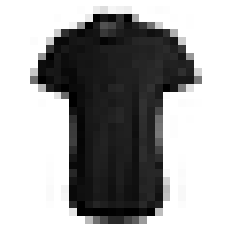

Our model predicted: T-shirt/top
The actual answer was: Shirt


In [16]:
import random
rand = random.randint(0,9999)

plt.subplot()
plt.axis('off')
plt.imshow(test_images[rand], cmap=plt.cm.binary)
plt.show()

prediction = np.argmax(predictions[rand])
actual = class_names[test_labels[rand]]
print(f'Our model predicted: {class_names[prediction]}')
print(f'The actual answer was: {actual}')

Below, we will show you how to make a prediction on a specific item and show it off

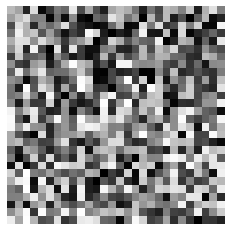

Our model predicted: Bag


In [14]:
# Generating a random array of values to see what our AI does
random_picture = (np.random.rand(1,28,28)) * 255

plt.subplot()
plt.axis('off')
plt.imshow(random_picture[0], cmap=plt.cm.binary)
plt.show()

rand_pred = np.argmax(model.predict(random_picture))
print(f'Our model predicted: {class_names[rand_pred]}')

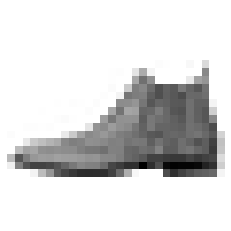

Our model predicted: Ankle boot
The actual answer was: Ankle boot


In [15]:
# Picking a single index that we want to show off
img_indx = 0
single_pic = np.array([test_images[img_indx]])

plt.subplot()
plt.axis('off')
plt.imshow(single_pic[img_indx], cmap=plt.cm.binary)
plt.show()

single_pred = np.argmax(model.predict(single_pic))
actual = class_names[test_labels[img_indx]]
print(f'Our model predicted: {class_names[single_pred]}')
print(f'The actual answer was: {actual}')